In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import tensorflow_datasets as tds
import math 
import numpy as np
import matplotlib.pyplot as plt
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset= dataset['train'], dataset['test']

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples {}".format(num_train_examples))
print("Number if test examples {}".format(num_test_examples))

Number of training examples 60000
Number if test examples 10000


In [8]:
def normalize(images,labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

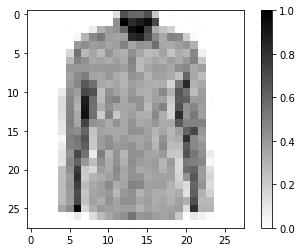

In [9]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape(28,28)
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

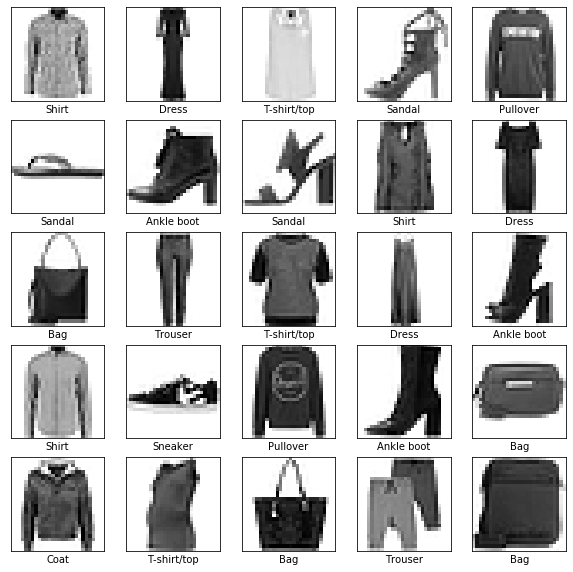

In [10]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10


 180/1875 [=>............................] - ETA: 8:54:00 - loss: 2.3185 - accuracy: 0.125 - ETA: 4:32:34 - loss: 2.2735 - accuracy: 0.203 - ETA: 3:04:06 - loss: 2.2699 - accuracy: 0.208 - ETA: 2:19:17 - loss: 2.2279 - accuracy: 0.250 - ETA: 1:52:25 - loss: 2.1819 - accuracy: 0.275 - ETA: 1:34:34 - loss: 2.1414 - accuracy: 0.296 - ETA: 1:21:45 - loss: 2.1054 - accuracy: 0.303 - ETA: 1:12:06 - loss: 2.0803 - accuracy: 0.304 - ETA: 1:04:38 - loss: 2.0432 - accuracy: 0.305 - ETA: 58:39 - loss: 2.0046 - accuracy: 0.3125  - ETA: 53:46 - loss: 1.9552 - accuracy: 0.326 - ETA: 49:42 - loss: 1.9073 - accuracy: 0.343 - ETA: 46:14 - loss: 1.8545 - accuracy: 0.370 - ETA: 43:15 - loss: 1.8144 - accuracy: 0.377 - ETA: 40:41 - loss: 1.7728 - accuracy: 0.387 - ETA: 38:26 - loss: 1.7309 - accuracy: 0.394 - ETA: 36:28 - loss: 1.6970 - accuracy: 0.408 - ETA: 34:43 - loss: 1.6617 - accuracy: 0.416 - ETA: 33:09 - loss: 1.6256 - accuracy: 0.432 - ETA: 31:43 - loss: 1.5905 - accuracy: 0.440 - ETA: 30:25 - lo

 366/1875 [====>.........................] - ETA: 7:31 - loss: 0.7515 - accuracy: 0.73 - ETA: 7:30 - loss: 0.7513 - accuracy: 0.73 - ETA: 7:29 - loss: 0.7489 - accuracy: 0.73 - ETA: 7:28 - loss: 0.7472 - accuracy: 0.73 - ETA: 7:27 - loss: 0.7465 - accuracy: 0.73 - ETA: 7:26 - loss: 0.7453 - accuracy: 0.73 - ETA: 7:24 - loss: 0.7445 - accuracy: 0.73 - ETA: 7:23 - loss: 0.7429 - accuracy: 0.73 - ETA: 7:22 - loss: 0.7420 - accuracy: 0.73 - ETA: 7:21 - loss: 0.7416 - accuracy: 0.73 - ETA: 7:20 - loss: 0.7424 - accuracy: 0.73 - ETA: 7:18 - loss: 0.7409 - accuracy: 0.73 - ETA: 7:17 - loss: 0.7413 - accuracy: 0.73 - ETA: 7:16 - loss: 0.7404 - accuracy: 0.73 - ETA: 7:15 - loss: 0.7396 - accuracy: 0.73 - ETA: 7:14 - loss: 0.7389 - accuracy: 0.73 - ETA: 7:13 - loss: 0.7381 - accuracy: 0.73 - ETA: 7:11 - loss: 0.7355 - accuracy: 0.74 - ETA: 7:10 - loss: 0.7352 - accuracy: 0.74 - ETA: 7:09 - loss: 0.7330 - accuracy: 0.74 - ETA: 7:08 - loss: 0.7321 - accuracy: 0.74 - ETA: 7:07 - loss: 0.7320 - accu

 552/1875 [=======>......................] - ETA: 5:20 - loss: 0.6196 - accuracy: 0.77 - ETA: 5:19 - loss: 0.6186 - accuracy: 0.77 - ETA: 5:19 - loss: 0.6181 - accuracy: 0.77 - ETA: 5:19 - loss: 0.6173 - accuracy: 0.78 - ETA: 5:18 - loss: 0.6167 - accuracy: 0.78 - ETA: 5:18 - loss: 0.6159 - accuracy: 0.78 - ETA: 5:17 - loss: 0.6151 - accuracy: 0.78 - ETA: 5:17 - loss: 0.6147 - accuracy: 0.78 - ETA: 5:16 - loss: 0.6147 - accuracy: 0.78 - ETA: 5:16 - loss: 0.6145 - accuracy: 0.78 - ETA: 5:15 - loss: 0.6136 - accuracy: 0.78 - ETA: 5:15 - loss: 0.6128 - accuracy: 0.78 - ETA: 5:15 - loss: 0.6121 - accuracy: 0.78 - ETA: 5:14 - loss: 0.6121 - accuracy: 0.78 - ETA: 5:14 - loss: 0.6120 - accuracy: 0.78 - ETA: 5:13 - loss: 0.6115 - accuracy: 0.78 - ETA: 5:13 - loss: 0.6109 - accuracy: 0.78 - ETA: 5:13 - loss: 0.6104 - accuracy: 0.78 - ETA: 5:12 - loss: 0.6101 - accuracy: 0.78 - ETA: 5:12 - loss: 0.6100 - accuracy: 0.78 - ETA: 5:11 - loss: 0.6093 - accuracy: 0.78 - ETA: 5:11 - loss: 0.6084 - accu

 738/1875 [==========>...................] - ETA: 4:16 - loss: 0.5426 - accuracy: 0.80 - ETA: 4:16 - loss: 0.5420 - accuracy: 0.80 - ETA: 4:15 - loss: 0.5423 - accuracy: 0.80 - ETA: 4:15 - loss: 0.5418 - accuracy: 0.80 - ETA: 4:15 - loss: 0.5418 - accuracy: 0.80 - ETA: 4:14 - loss: 0.5414 - accuracy: 0.80 - ETA: 4:14 - loss: 0.5412 - accuracy: 0.80 - ETA: 4:14 - loss: 0.5408 - accuracy: 0.80 - ETA: 4:14 - loss: 0.5406 - accuracy: 0.80 - ETA: 4:13 - loss: 0.5400 - accuracy: 0.80 - ETA: 4:13 - loss: 0.5397 - accuracy: 0.80 - ETA: 4:13 - loss: 0.5392 - accuracy: 0.80 - ETA: 4:13 - loss: 0.5386 - accuracy: 0.80 - ETA: 4:12 - loss: 0.5387 - accuracy: 0.80 - ETA: 4:12 - loss: 0.5383 - accuracy: 0.80 - ETA: 4:12 - loss: 0.5378 - accuracy: 0.80 - ETA: 4:11 - loss: 0.5377 - accuracy: 0.80 - ETA: 4:11 - loss: 0.5372 - accuracy: 0.80 - ETA: 4:11 - loss: 0.5369 - accuracy: 0.80 - ETA: 4:11 - loss: 0.5371 - accuracy: 0.80 - ETA: 4:10 - loss: 0.5372 - accuracy: 0.80 - ETA: 4:10 - loss: 0.5368 - accu

 924/1875 [=============>................] - ETA: 3:30 - loss: 0.5073 - accuracy: 0.81 - ETA: 3:30 - loss: 0.5073 - accuracy: 0.81 - ETA: 3:30 - loss: 0.5072 - accuracy: 0.81 - ETA: 3:30 - loss: 0.5071 - accuracy: 0.81 - ETA: 3:30 - loss: 0.5070 - accuracy: 0.81 - ETA: 3:29 - loss: 0.5067 - accuracy: 0.81 - ETA: 3:29 - loss: 0.5064 - accuracy: 0.81 - ETA: 3:29 - loss: 0.5063 - accuracy: 0.81 - ETA: 3:29 - loss: 0.5060 - accuracy: 0.81 - ETA: 3:29 - loss: 0.5060 - accuracy: 0.81 - ETA: 3:28 - loss: 0.5058 - accuracy: 0.81 - ETA: 3:28 - loss: 0.5059 - accuracy: 0.81 - ETA: 3:28 - loss: 0.5056 - accuracy: 0.81 - ETA: 3:28 - loss: 0.5053 - accuracy: 0.81 - ETA: 3:27 - loss: 0.5050 - accuracy: 0.81 - ETA: 3:27 - loss: 0.5048 - accuracy: 0.81 - ETA: 3:27 - loss: 0.5043 - accuracy: 0.81 - ETA: 3:27 - loss: 0.5043 - accuracy: 0.81 - ETA: 3:27 - loss: 0.5041 - accuracy: 0.81 - ETA: 3:26 - loss: 0.5039 - accuracy: 0.81 - ETA: 3:26 - loss: 0.5035 - accuracy: 0.81 - ETA: 3:26 - loss: 0.5034 - accu

1110/1875 [================>.............] - ETA: 2:52 - loss: 0.4778 - accuracy: 0.82 - ETA: 2:52 - loss: 0.4776 - accuracy: 0.82 - ETA: 2:52 - loss: 0.4778 - accuracy: 0.82 - ETA: 2:51 - loss: 0.4775 - accuracy: 0.82 - ETA: 2:51 - loss: 0.4775 - accuracy: 0.82 - ETA: 2:51 - loss: 0.4777 - accuracy: 0.82 - ETA: 2:51 - loss: 0.4776 - accuracy: 0.82 - ETA: 2:51 - loss: 0.4773 - accuracy: 0.82 - ETA: 2:50 - loss: 0.4773 - accuracy: 0.82 - ETA: 2:50 - loss: 0.4772 - accuracy: 0.82 - ETA: 2:50 - loss: 0.4769 - accuracy: 0.82 - ETA: 2:50 - loss: 0.4772 - accuracy: 0.82 - ETA: 2:50 - loss: 0.4771 - accuracy: 0.82 - ETA: 2:49 - loss: 0.4771 - accuracy: 0.82 - ETA: 2:49 - loss: 0.4770 - accuracy: 0.82 - ETA: 2:49 - loss: 0.4768 - accuracy: 0.82 - ETA: 2:49 - loss: 0.4768 - accuracy: 0.82 - ETA: 2:49 - loss: 0.4766 - accuracy: 0.82 - ETA: 2:48 - loss: 0.4765 - accuracy: 0.82 - ETA: 2:48 - loss: 0.4764 - accuracy: 0.82 - ETA: 2:48 - loss: 0.4761 - accuracy: 0.82 - ETA: 2:48 - loss: 0.4763 - accu

1296/1875 [===================>..........] - ETA: 2:15 - loss: 0.4555 - accuracy: 0.83 - ETA: 2:15 - loss: 0.4553 - accuracy: 0.83 - ETA: 2:15 - loss: 0.4552 - accuracy: 0.83 - ETA: 2:15 - loss: 0.4552 - accuracy: 0.83 - ETA: 2:15 - loss: 0.4551 - accuracy: 0.83 - ETA: 2:14 - loss: 0.4550 - accuracy: 0.83 - ETA: 2:14 - loss: 0.4548 - accuracy: 0.83 - ETA: 2:14 - loss: 0.4546 - accuracy: 0.83 - ETA: 2:14 - loss: 0.4544 - accuracy: 0.83 - ETA: 2:14 - loss: 0.4543 - accuracy: 0.83 - ETA: 2:13 - loss: 0.4542 - accuracy: 0.83 - ETA: 2:13 - loss: 0.4540 - accuracy: 0.83 - ETA: 2:13 - loss: 0.4539 - accuracy: 0.83 - ETA: 2:13 - loss: 0.4539 - accuracy: 0.83 - ETA: 2:13 - loss: 0.4539 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4538 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4537 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4535 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4536 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4536 - accuracy: 0.83 - ETA: 2:12 - loss: 0.4537 - accuracy: 0.83 - ETA: 2:11 - loss: 0.4535 - accu

1482/1875 [======================>.......] - ETA: 1:40 - loss: 0.4365 - accuracy: 0.84 - ETA: 1:40 - loss: 0.4363 - accuracy: 0.84 - ETA: 1:40 - loss: 0.4363 - accuracy: 0.84 - ETA: 1:40 - loss: 0.4361 - accuracy: 0.84 - ETA: 1:40 - loss: 0.4361 - accuracy: 0.84 - ETA: 1:40 - loss: 0.4360 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4359 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4358 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4357 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4357 - accuracy: 0.84 - ETA: 1:39 - loss: 0.4356 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4356 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4355 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4355 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4353 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4353 - accuracy: 0.84 - ETA: 1:38 - loss: 0.4351 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4353 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4353 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4351 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4352 - accuracy: 0.84 - ETA: 1:37 - loss: 0.4352 - accu

1668/1875 [=========================>....] - ETA: 1:07 - loss: 0.4197 - accuracy: 0.84 - ETA: 1:07 - loss: 0.4197 - accuracy: 0.84 - ETA: 1:07 - loss: 0.4198 - accuracy: 0.84 - ETA: 1:07 - loss: 0.4197 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4196 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4195 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4194 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4193 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4192 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4192 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4191 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4189 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4189 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4187 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4186 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4184 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4183 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4183 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4182 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4180 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4180 - accuracy: 0.84 - ETA: 1:03 - loss: 0.4180 - accu

1855/1875 [============================>.] - ETA: 35s - loss: 0.4071 - accuracy: 0.853 - ETA: 35s - loss: 0.4069 - accuracy: 0.853 - ETA: 34s - loss: 0.4070 - accuracy: 0.853 - ETA: 34s - loss: 0.4068 - accuracy: 0.853 - ETA: 34s - loss: 0.4067 - accuracy: 0.853 - ETA: 34s - loss: 0.4067 - accuracy: 0.853 - ETA: 34s - loss: 0.4067 - accuracy: 0.853 - ETA: 34s - loss: 0.4067 - accuracy: 0.853 - ETA: 33s - loss: 0.4067 - accuracy: 0.853 - ETA: 33s - loss: 0.4066 - accuracy: 0.853 - ETA: 33s - loss: 0.4065 - accuracy: 0.853 - ETA: 33s - loss: 0.4065 - accuracy: 0.853 - ETA: 33s - loss: 0.4066 - accuracy: 0.853 - ETA: 32s - loss: 0.4065 - accuracy: 0.854 - ETA: 32s - loss: 0.4064 - accuracy: 0.854 - ETA: 32s - loss: 0.4064 - accuracy: 0.853 - ETA: 32s - loss: 0.4065 - accuracy: 0.853 - ETA: 32s - loss: 0.4065 - accuracy: 0.853 - ETA: 32s - loss: 0.4064 - accuracy: 0.853 - ETA: 31s - loss: 0.4063 - accuracy: 0.854 - ETA: 31s - loss: 0.4062 - accuracy: 0.854 - ETA: 31s - loss: 0.4061 - accur

1875/1875 [==============================] - ETA: 3s - loss: 0.3974 - accuracy: 0.85 - ETA: 3s - loss: 0.3973 - accuracy: 0.85 - ETA: 2s - loss: 0.3973 - accuracy: 0.85 - ETA: 2s - loss: 0.3972 - accuracy: 0.85 - ETA: 2s - loss: 0.3971 - accuracy: 0.85 - ETA: 2s - loss: 0.3972 - accuracy: 0.85 - ETA: 2s - loss: 0.3973 - accuracy: 0.85 - ETA: 2s - loss: 0.3972 - accuracy: 0.85 - ETA: 1s - loss: 0.3971 - accuracy: 0.85 - ETA: 1s - loss: 0.3970 - accuracy: 0.85 - ETA: 1s - loss: 0.3969 - accuracy: 0.85 - ETA: 1s - loss: 0.3968 - accuracy: 0.85 - ETA: 1s - loss: 0.3968 - accuracy: 0.85 - ETA: 1s - loss: 0.3966 - accuracy: 0.85 - ETA: 0s - loss: 0.3968 - accuracy: 0.85 - ETA: 0s - loss: 0.3967 - accuracy: 0.85 - ETA: 0s - loss: 0.3966 - accuracy: 0.85 - ETA: 0s - loss: 0.3966 - accuracy: 0.85 - ETA: 0s - loss: 0.3967 - accuracy: 0.85 - 318s 169ms/step - loss: 0.3966 - accuracy: 0.8573
Epoch 2/10


 186/1875 [=>............................] - ETA: 4:48 - loss: 0.4382 - accuracy: 0.84 - ETA: 4:53 - loss: 0.3430 - accuracy: 0.85 - ETA: 4:52 - loss: 0.3153 - accuracy: 0.87 - ETA: 4:49 - loss: 0.3033 - accuracy: 0.88 - ETA: 4:47 - loss: 0.2655 - accuracy: 0.90 - ETA: 4:46 - loss: 0.2784 - accuracy: 0.90 - ETA: 4:48 - loss: 0.2561 - accuracy: 0.91 - ETA: 4:47 - loss: 0.2942 - accuracy: 0.89 - ETA: 4:43 - loss: 0.3074 - accuracy: 0.89 - ETA: 4:46 - loss: 0.3047 - accuracy: 0.89 - ETA: 4:45 - loss: 0.3359 - accuracy: 0.88 - ETA: 4:47 - loss: 0.3386 - accuracy: 0.88 - ETA: 4:50 - loss: 0.3336 - accuracy: 0.88 - ETA: 4:50 - loss: 0.3549 - accuracy: 0.87 - ETA: 4:49 - loss: 0.3528 - accuracy: 0.87 - ETA: 4:50 - loss: 0.3488 - accuracy: 0.88 - ETA: 4:48 - loss: 0.3408 - accuracy: 0.88 - ETA: 4:47 - loss: 0.3605 - accuracy: 0.87 - ETA: 4:48 - loss: 0.3526 - accuracy: 0.88 - ETA: 4:49 - loss: 0.3576 - accuracy: 0.87 - ETA: 4:48 - loss: 0.3520 - accuracy: 0.88 - ETA: 4:50 - loss: 0.3473 - accu

 372/1875 [====>.........................] - ETA: 4:26 - loss: 0.2983 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2983 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2985 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2994 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2990 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2993 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2994 - accuracy: 0.89 - ETA: 4:25 - loss: 0.2991 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2986 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2979 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2985 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2989 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2992 - accuracy: 0.89 - ETA: 4:24 - loss: 0.2998 - accuracy: 0.89 - ETA: 4:24 - loss: 0.3001 - accuracy: 0.89 - ETA: 4:23 - loss: 0.3000 - accuracy: 0.89 - ETA: 4:23 - loss: 0.2993 - accuracy: 0.89 - ETA: 4:23 - loss: 0.3000 - accuracy: 0.89 - ETA: 4:23 - loss: 0.3005 - accuracy: 0.89 - ETA: 4:23 - loss: 0.3007 - accuracy: 0.89 - ETA: 4:23 - loss: 0.3007 - accuracy: 0.89 - ETA: 4:23 - loss: 0.3006 - accu

 558/1875 [=======>......................] - ETA: 3:59 - loss: 0.2891 - accuracy: 0.89 - ETA: 3:59 - loss: 0.2888 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2888 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2886 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2884 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2884 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2883 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2879 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2879 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2879 - accuracy: 0.89 - ETA: 3:58 - loss: 0.2876 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2871 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2872 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2877 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2878 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2882 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2886 - accuracy: 0.89 - ETA: 3:57 - loss: 0.2886 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2890 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2887 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2889 - accuracy: 0.89 - ETA: 3:56 - loss: 0.2887 - accu

 744/1875 [==========>...................] - ETA: 3:37 - loss: 0.2853 - accuracy: 0.89 - ETA: 3:37 - loss: 0.2849 - accuracy: 0.89 - ETA: 3:37 - loss: 0.2847 - accuracy: 0.89 - ETA: 3:36 - loss: 0.2846 - accuracy: 0.89 - ETA: 3:36 - loss: 0.2844 - accuracy: 0.89 - ETA: 3:36 - loss: 0.2845 - accuracy: 0.89 - ETA: 3:36 - loss: 0.2843 - accuracy: 0.89 - ETA: 3:36 - loss: 0.2841 - accuracy: 0.89 - ETA: 3:36 - loss: 0.2844 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2843 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2841 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2840 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2837 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2834 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2831 - accuracy: 0.89 - ETA: 3:35 - loss: 0.2833 - accuracy: 0.89 - ETA: 3:34 - loss: 0.2833 - accuracy: 0.89 - ETA: 3:34 - loss: 0.2836 - accuracy: 0.89 - ETA: 3:34 - loss: 0.2835 - accuracy: 0.89 - ETA: 3:34 - loss: 0.2833 - accuracy: 0.89 - ETA: 3:34 - loss: 0.2831 - accuracy: 0.89 - ETA: 3:34 - loss: 0.2829 - accu

 930/1875 [=============>................] - ETA: 3:05 - loss: 0.2796 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2797 - accuracy: 0.89 - ETA: 3:05 - loss: 0.2797 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2797 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2798 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2801 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2799 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2797 - accuracy: 0.89 - ETA: 3:04 - loss: 0.2800 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2804 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2802 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2801 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2801 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2799 - accuracy: 0.89 - ETA: 3:03 - loss: 0.2798 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2798 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2803 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2806 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2806 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2807 - accuracy: 0.89 - ETA: 3:02 - loss: 0.2809 - accuracy: 0.89 - ETA: 3:01 - loss: 0.2807 - accu

1116/1875 [================>.............] - ETA: 2:33 - loss: 0.2770 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2769 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2770 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2770 - accuracy: 0.89 - ETA: 2:33 - loss: 0.2770 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2770 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2769 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2768 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2768 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2769 - accuracy: 0.89 - ETA: 2:32 - loss: 0.2770 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2768 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2768 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2769 - accuracy: 0.89 - ETA: 2:31 - loss: 0.2769 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2766 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2767 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2768 - accuracy: 0.89 - ETA: 2:30 - loss: 0.2768 - accu

1302/1875 [===================>..........] - ETA: 2:02 - loss: 0.2726 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2725 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2725 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2726 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2726 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2725 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2724 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2724 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2724 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2723 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2725 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2725 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2727 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2728 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2728 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2728 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2726 - accuracy: 0.90 - ETA: 2:00 - loss: 0.2726 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2727 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2727 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2727 - accuracy: 0.90 - ETA: 1:59 - loss: 0.2726 - accu

1488/1875 [======================>.......] - ETA: 1:32 - loss: 0.2711 - accuracy: 0.90 - ETA: 1:32 - loss: 0.2712 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2710 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2709 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2708 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2708 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2707 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2706 - accuracy: 0.90 - ETA: 1:31 - loss: 0.2706 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2705 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2707 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2707 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2707 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2706 - accuracy: 0.90 - ETA: 1:30 - loss: 0.2705 - accuracy: 0.90 - ETA: 1:29 - loss: 0.2705 - accuracy: 0.90 - ETA: 1:29 - loss: 0.2704 - accuracy: 0.90 - ETA: 1:29 - loss: 0.2705 - accuracy: 0.90 - ETA: 1:29 - loss: 0.2705 - accuracy: 0.90 - ETA: 1:29 - loss: 0.2706 - accuracy: 0.90 - ETA: 1:29 - loss: 0.2706 - accuracy: 0.90 - ETA: 1:28 - loss: 0.2706 - accu

1674/1875 [=========================>....] - ETA: 1:02 - loss: 0.2698 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2698 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2697 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2696 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2698 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2697 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2697 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2697 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2697 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2698 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2698 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2697 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2696 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2696 - accuracy: 0.90 - ETA: 59s - loss: 0.2695 - accuracy: 0.9023 - ETA: 59s - loss: 0.2695 - accuracy: 0.902 - ETA: 59s - loss: 0.2695 - accuracy: 0.902 - ETA: 59s - loss: 0.2693 - accuracy: 0.902 - ETA: 59s - loss: 0.2694 - accuracy: 0.902 - ETA: 59s - loss: 0.2695 - accuracy: 0.902 - ETA: 58s - loss: 0.2694 - accuracy: 0.902 - ETA: 58s - loss: 0.2696 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.2678 - accuracy: 0.902 - ETA: 31s - loss: 0.2677 - accuracy: 0.902 - ETA: 31s - loss: 0.2677 - accuracy: 0.902 - ETA: 31s - loss: 0.2678 - accuracy: 0.902 - ETA: 31s - loss: 0.2678 - accuracy: 0.902 - ETA: 31s - loss: 0.2678 - accuracy: 0.902 - ETA: 31s - loss: 0.2679 - accuracy: 0.902 - ETA: 30s - loss: 0.2678 - accuracy: 0.902 - ETA: 30s - loss: 0.2679 - accuracy: 0.902 - ETA: 30s - loss: 0.2679 - accuracy: 0.902 - ETA: 30s - loss: 0.2680 - accuracy: 0.902 - ETA: 30s - loss: 0.2679 - accuracy: 0.902 - ETA: 30s - loss: 0.2680 - accuracy: 0.902 - ETA: 30s - loss: 0.2680 - accuracy: 0.902 - ETA: 29s - loss: 0.2679 - accuracy: 0.902 - ETA: 29s - loss: 0.2679 - accuracy: 0.902 - ETA: 29s - loss: 0.2679 - accuracy: 0.902 - ETA: 29s - loss: 0.2679 - accuracy: 0.902 - ETA: 29s - loss: 0.2679 - accuracy: 0.902 - ETA: 29s - loss: 0.2679 - accuracy: 0.902 - ETA: 28s - loss: 0.2681 - accuracy: 0.902 - ETA: 28s - loss: 0.2681 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.2657 - accuracy: 0.90 - ETA: 1s - loss: 0.2657 - accuracy: 0.90 - ETA: 1s - loss: 0.2656 - accuracy: 0.90 - ETA: 1s - loss: 0.2656 - accuracy: 0.90 - ETA: 1s - loss: 0.2655 - accuracy: 0.90 - ETA: 1s - loss: 0.2655 - accuracy: 0.90 - ETA: 0s - loss: 0.2655 - accuracy: 0.90 - ETA: 0s - loss: 0.2655 - accuracy: 0.90 - ETA: 0s - loss: 0.2656 - accuracy: 0.90 - ETA: 0s - loss: 0.2656 - accuracy: 0.90 - ETA: 0s - loss: 0.2655 - accuracy: 0.90 - ETA: 0s - loss: 0.2655 - accuracy: 0.90 - 300s 160ms/step - loss: 0.2655 - accuracy: 0.9033
Epoch 3/10


 186/1875 [=>............................] - ETA: 5:06 - loss: 0.4829 - accuracy: 0.84 - ETA: 5:02 - loss: 0.3388 - accuracy: 0.90 - ETA: 5:04 - loss: 0.2511 - accuracy: 0.93 - ETA: 4:57 - loss: 0.2368 - accuracy: 0.93 - ETA: 5:00 - loss: 0.2496 - accuracy: 0.92 - ETA: 4:59 - loss: 0.2692 - accuracy: 0.92 - ETA: 4:58 - loss: 0.2396 - accuracy: 0.93 - ETA: 4:58 - loss: 0.2233 - accuracy: 0.94 - ETA: 4:56 - loss: 0.2136 - accuracy: 0.94 - ETA: 4:58 - loss: 0.2172 - accuracy: 0.93 - ETA: 5:00 - loss: 0.2019 - accuracy: 0.93 - ETA: 5:00 - loss: 0.2115 - accuracy: 0.93 - ETA: 4:59 - loss: 0.2159 - accuracy: 0.93 - ETA: 4:59 - loss: 0.2172 - accuracy: 0.93 - ETA: 4:58 - loss: 0.2148 - accuracy: 0.93 - ETA: 4:59 - loss: 0.2116 - accuracy: 0.93 - ETA: 4:59 - loss: 0.2080 - accuracy: 0.93 - ETA: 4:58 - loss: 0.2098 - accuracy: 0.93 - ETA: 4:57 - loss: 0.2286 - accuracy: 0.92 - ETA: 4:56 - loss: 0.2258 - accuracy: 0.92 - ETA: 4:57 - loss: 0.2206 - accuracy: 0.92 - ETA: 4:56 - loss: 0.2268 - accu

 372/1875 [====>.........................] - ETA: 4:24 - loss: 0.2435 - accuracy: 0.91 - ETA: 4:24 - loss: 0.2427 - accuracy: 0.91 - ETA: 4:24 - loss: 0.2421 - accuracy: 0.91 - ETA: 4:24 - loss: 0.2430 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2422 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2414 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2413 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2411 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2409 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2413 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2405 - accuracy: 0.91 - ETA: 4:23 - loss: 0.2403 - accuracy: 0.91 - ETA: 4:22 - loss: 0.2408 - accuracy: 0.91 - ETA: 4:22 - loss: 0.2409 - accuracy: 0.91 - ETA: 4:22 - loss: 0.2405 - accuracy: 0.91 - ETA: 4:22 - loss: 0.2404 - accuracy: 0.91 - ETA: 4:22 - loss: 0.2398 - accuracy: 0.91 - ETA: 4:22 - loss: 0.2401 - accuracy: 0.91 - ETA: 4:21 - loss: 0.2404 - accuracy: 0.91 - ETA: 4:21 - loss: 0.2413 - accuracy: 0.91 - ETA: 4:21 - loss: 0.2406 - accuracy: 0.91 - ETA: 4:21 - loss: 0.2405 - accu

 558/1875 [=======>......................] - ETA: 4:04 - loss: 0.2313 - accuracy: 0.91 - ETA: 4:04 - loss: 0.2312 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2312 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2310 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2310 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2306 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2312 - accuracy: 0.91 - ETA: 4:03 - loss: 0.2317 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2322 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2322 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2322 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2322 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2319 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2317 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2324 - accuracy: 0.91 - ETA: 4:02 - loss: 0.2321 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2328 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2331 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2331 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2337 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2339 - accuracy: 0.91 - ETA: 4:01 - loss: 0.2338 - accu

 744/1875 [==========>...................] - ETA: 3:32 - loss: 0.2319 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2319 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2316 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2318 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2317 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2320 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2320 - accuracy: 0.91 - ETA: 3:30 - loss: 0.2323 - accuracy: 0.91 - ETA: 3:30 - loss: 0.2325 - accuracy: 0.91 - ETA: 3:30 - loss: 0.2327 - accuracy: 0.91 - ETA: 3:30 - loss: 0.2326 - accuracy: 0.91 - ETA: 3:30 - loss: 0.2326 - accuracy: 0.91 - ETA: 3:30 - loss: 0.2325 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2327 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2328 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2326 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2325 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2323 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2324 - accuracy: 0.91 - ETA: 3:28 - loss: 0.2323 - accuracy: 0.91 - ETA: 3:28 - loss: 0.2324 - accuracy: 0.91 - ETA: 3:28 - loss: 0.2324 - accu

 930/1875 [=============>................] - ETA: 3:01 - loss: 0.2329 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2330 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2332 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2330 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2330 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2328 - accuracy: 0.91 - ETA: 3:00 - loss: 0.2326 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2328 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2329 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2329 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2329 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2327 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2327 - accuracy: 0.91 - ETA: 2:59 - loss: 0.2327 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2329 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2327 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2327 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2326 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2324 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2324 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2322 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2321 - accu

1116/1875 [================>.............] - ETA: 2:34 - loss: 0.2317 - accuracy: 0.91 - ETA: 2:34 - loss: 0.2317 - accuracy: 0.91 - ETA: 2:34 - loss: 0.2316 - accuracy: 0.91 - ETA: 2:34 - loss: 0.2318 - accuracy: 0.91 - ETA: 2:34 - loss: 0.2318 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2318 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2316 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2314 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2314 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2313 - accuracy: 0.91 - ETA: 2:33 - loss: 0.2313 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2313 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2312 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2311 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2311 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2310 - accuracy: 0.91 - ETA: 2:32 - loss: 0.2310 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2308 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2308 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2307 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2306 - accuracy: 0.91 - ETA: 2:31 - loss: 0.2308 - accu

1302/1875 [===================>..........] - ETA: 2:03 - loss: 0.2279 - accuracy: 0.91 - ETA: 2:03 - loss: 0.2280 - accuracy: 0.91 - ETA: 2:03 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:02 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:02 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:02 - loss: 0.2283 - accuracy: 0.91 - ETA: 2:02 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:02 - loss: 0.2282 - accuracy: 0.91 - ETA: 2:02 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2282 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2282 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2280 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2281 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2279 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2280 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2280 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2280 - accuracy: 0.91 - ETA: 2:00 - loss: 0.2279 - accuracy: 0.91 - ETA: 1:59 - loss: 0.2278 - accu

1488/1875 [======================>.......] - ETA: 1:32 - loss: 0.2273 - accuracy: 0.91 - ETA: 1:32 - loss: 0.2272 - accuracy: 0.91 - ETA: 1:32 - loss: 0.2271 - accuracy: 0.91 - ETA: 1:32 - loss: 0.2271 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2271 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2272 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2271 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2271 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2271 - accuracy: 0.91 - ETA: 1:31 - loss: 0.2272 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2272 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2273 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2274 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2275 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2275 - accuracy: 0.91 - ETA: 1:30 - loss: 0.2276 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2278 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2278 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2276 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2276 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2276 - accuracy: 0.91 - ETA: 1:29 - loss: 0.2277 - accu

1674/1875 [=========================>....] - ETA: 1:02 - loss: 0.2248 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2248 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2248 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2247 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2248 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2247 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2248 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2247 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2247 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2246 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2246 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2246 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2245 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2244 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2245 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2244 - accuracy: 0.91 - ETA: 59s - loss: 0.2243 - accuracy: 0.9171 - ETA: 59s - loss: 0.2243 - accuracy: 0.917 - ETA: 59s - loss: 0.2242 - accuracy: 0.917 - ETA: 59s - loss: 0.2241 - accuracy: 0.917 - ETA: 59s - loss: 0.2240 - accuracy: 0.917 - ETA: 59s - loss: 0.2241 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.2221 - accuracy: 0.918 - ETA: 32s - loss: 0.2221 - accuracy: 0.918 - ETA: 32s - loss: 0.2222 - accuracy: 0.918 - ETA: 31s - loss: 0.2221 - accuracy: 0.918 - ETA: 31s - loss: 0.2220 - accuracy: 0.918 - ETA: 31s - loss: 0.2220 - accuracy: 0.918 - ETA: 31s - loss: 0.2220 - accuracy: 0.918 - ETA: 31s - loss: 0.2220 - accuracy: 0.918 - ETA: 31s - loss: 0.2220 - accuracy: 0.918 - ETA: 30s - loss: 0.2219 - accuracy: 0.918 - ETA: 30s - loss: 0.2221 - accuracy: 0.918 - ETA: 30s - loss: 0.2221 - accuracy: 0.918 - ETA: 30s - loss: 0.2224 - accuracy: 0.918 - ETA: 30s - loss: 0.2224 - accuracy: 0.918 - ETA: 30s - loss: 0.2223 - accuracy: 0.918 - ETA: 29s - loss: 0.2223 - accuracy: 0.918 - ETA: 29s - loss: 0.2222 - accuracy: 0.918 - ETA: 29s - loss: 0.2222 - accuracy: 0.918 - ETA: 29s - loss: 0.2221 - accuracy: 0.918 - ETA: 29s - loss: 0.2221 - accuracy: 0.918 - ETA: 29s - loss: 0.2221 - accuracy: 0.918 - ETA: 28s - loss: 0.2221 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.2212 - accuracy: 0.91 - ETA: 1s - loss: 0.2212 - accuracy: 0.91 - ETA: 1s - loss: 0.2212 - accuracy: 0.91 - ETA: 1s - loss: 0.2212 - accuracy: 0.91 - ETA: 1s - loss: 0.2212 - accuracy: 0.91 - ETA: 1s - loss: 0.2211 - accuracy: 0.91 - ETA: 0s - loss: 0.2212 - accuracy: 0.91 - ETA: 0s - loss: 0.2211 - accuracy: 0.91 - ETA: 0s - loss: 0.2211 - accuracy: 0.91 - ETA: 0s - loss: 0.2211 - accuracy: 0.91 - ETA: 0s - loss: 0.2210 - accuracy: 0.91 - ETA: 0s - loss: 0.2210 - accuracy: 0.91 - 303s 161ms/step - loss: 0.2209 - accuracy: 0.9186
Epoch 4/10


 186/1875 [=>............................] - ETA: 4:59 - loss: 0.3399 - accuracy: 0.84 - ETA: 4:54 - loss: 0.3862 - accuracy: 0.84 - ETA: 4:46 - loss: 0.3341 - accuracy: 0.85 - ETA: 4:54 - loss: 0.3401 - accuracy: 0.85 - ETA: 4:51 - loss: 0.3520 - accuracy: 0.85 - ETA: 4:54 - loss: 0.3241 - accuracy: 0.86 - ETA: 4:55 - loss: 0.3110 - accuracy: 0.88 - ETA: 4:56 - loss: 0.2912 - accuracy: 0.88 - ETA: 4:58 - loss: 0.2756 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2639 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2717 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2521 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2589 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2489 - accuracy: 0.90 - ETA: 4:53 - loss: 0.2442 - accuracy: 0.91 - ETA: 4:52 - loss: 0.2405 - accuracy: 0.91 - ETA: 4:52 - loss: 0.2355 - accuracy: 0.91 - ETA: 4:53 - loss: 0.2295 - accuracy: 0.91 - ETA: 4:53 - loss: 0.2237 - accuracy: 0.91 - ETA: 4:54 - loss: 0.2238 - accuracy: 0.91 - ETA: 4:54 - loss: 0.2209 - accuracy: 0.92 - ETA: 4:53 - loss: 0.2187 - accu

 372/1875 [====>.........................] - ETA: 4:25 - loss: 0.1978 - accuracy: 0.92 - ETA: 4:25 - loss: 0.1970 - accuracy: 0.92 - ETA: 4:25 - loss: 0.1965 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1961 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1968 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1969 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1969 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1966 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1965 - accuracy: 0.92 - ETA: 4:24 - loss: 0.1965 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1967 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1959 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1957 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1950 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1946 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1943 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1939 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1938 - accuracy: 0.92 - ETA: 4:22 - loss: 0.1941 - accuracy: 0.92 - ETA: 4:22 - loss: 0.1941 - accuracy: 0.92 - ETA: 4:22 - loss: 0.1939 - accuracy: 0.92 - ETA: 4:22 - loss: 0.1947 - accu

 558/1875 [=======>......................] - ETA: 3:57 - loss: 0.1971 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1973 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1969 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1967 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1964 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1961 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1961 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1962 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1961 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1959 - accuracy: 0.92 - ETA: 3:57 - loss: 0.1957 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1958 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1954 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1955 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1954 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1951 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1953 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1953 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1950 - accuracy: 0.92 - ETA: 3:56 - loss: 0.1948 - accuracy: 0.92 - ETA: 3:55 - loss: 0.1948 - accuracy: 0.92 - ETA: 3:55 - loss: 0.1946 - accu

 744/1875 [==========>...................] - ETA: 3:33 - loss: 0.1922 - accuracy: 0.92 - ETA: 3:33 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:33 - loss: 0.1924 - accuracy: 0.92 - ETA: 3:33 - loss: 0.1924 - accuracy: 0.92 - ETA: 3:32 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:32 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:32 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:32 - loss: 0.1928 - accuracy: 0.92 - ETA: 3:32 - loss: 0.1925 - accuracy: 0.92 - ETA: 3:32 - loss: 0.1924 - accuracy: 0.92 - ETA: 3:31 - loss: 0.1922 - accuracy: 0.92 - ETA: 3:31 - loss: 0.1923 - accuracy: 0.92 - ETA: 3:31 - loss: 0.1923 - accuracy: 0.92 - ETA: 3:31 - loss: 0.1923 - accuracy: 0.92 - ETA: 3:31 - loss: 0.1922 - accuracy: 0.92 - ETA: 3:31 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:30 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:30 - loss: 0.1928 - accuracy: 0.92 - ETA: 3:30 - loss: 0.1928 - accuracy: 0.92 - ETA: 3:30 - loss: 0.1926 - accuracy: 0.92 - ETA: 3:30 - loss: 0.1926 - accuracy: 0.92 - ETA: 3:30 - loss: 0.1924 - accu

 930/1875 [=============>................] - ETA: 3:04 - loss: 0.1931 - accuracy: 0.92 - ETA: 3:04 - loss: 0.1932 - accuracy: 0.92 - ETA: 3:04 - loss: 0.1931 - accuracy: 0.92 - ETA: 3:04 - loss: 0.1931 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1931 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1931 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1930 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:03 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1931 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1930 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1930 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:02 - loss: 0.1929 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1928 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1926 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1927 - accuracy: 0.92 - ETA: 3:01 - loss: 0.1926 - accuracy: 0.92 - ETA: 3:00 - loss: 0.1925 - accu

1116/1875 [================>.............] - ETA: 2:33 - loss: 0.1916 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1918 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1917 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1917 - accuracy: 0.92 - ETA: 2:33 - loss: 0.1917 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1917 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1917 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1918 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1916 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1915 - accuracy: 0.92 - ETA: 2:32 - loss: 0.1916 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1917 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1919 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1918 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1919 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1921 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1920 - accuracy: 0.92 - ETA: 2:31 - loss: 0.1922 - accuracy: 0.92 - ETA: 2:30 - loss: 0.1922 - accuracy: 0.92 - ETA: 2:30 - loss: 0.1921 - accuracy: 0.92 - ETA: 2:30 - loss: 0.1921 - accuracy: 0.92 - ETA: 2:30 - loss: 0.1919 - accu

1302/1875 [===================>..........] - ETA: 2:03 - loss: 0.1889 - accuracy: 0.93 - ETA: 2:03 - loss: 0.1891 - accuracy: 0.93 - ETA: 2:03 - loss: 0.1890 - accuracy: 0.93 - ETA: 2:03 - loss: 0.1890 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1892 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1891 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1892 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1891 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1891 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1893 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1893 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1893 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1892 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1891 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1891 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1890 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1890 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1889 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1890 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1889 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1888 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1887 - accu

1488/1875 [======================>.......] - ETA: 1:33 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:33 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:33 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1890 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1890 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1890 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1891 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1890 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:32 - loss: 0.1890 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1890 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1889 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1887 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1888 - accu

1674/1875 [=========================>....] - ETA: 1:03 - loss: 0.1878 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1878 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1878 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1879 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1878 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1877 - accuracy: 0.93 - ETA: 1:02 - loss: 0.1877 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1877 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1876 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1876 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1876 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1875 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1875 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1875 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1874 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1873 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1873 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1873 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1873 - accuracy: 0.93 - ETA: 59s - loss: 0.1873 - accuracy: 0.9318 - ETA: 59s - loss: 0.1874 - accuracy: 0.931 - ETA: 59s - loss: 0.1874 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.1871 - accuracy: 0.931 - ETA: 32s - loss: 0.1874 - accuracy: 0.931 - ETA: 32s - loss: 0.1874 - accuracy: 0.931 - ETA: 32s - loss: 0.1874 - accuracy: 0.931 - ETA: 31s - loss: 0.1873 - accuracy: 0.931 - ETA: 31s - loss: 0.1873 - accuracy: 0.931 - ETA: 31s - loss: 0.1873 - accuracy: 0.931 - ETA: 31s - loss: 0.1872 - accuracy: 0.931 - ETA: 31s - loss: 0.1873 - accuracy: 0.931 - ETA: 31s - loss: 0.1872 - accuracy: 0.931 - ETA: 30s - loss: 0.1872 - accuracy: 0.931 - ETA: 30s - loss: 0.1871 - accuracy: 0.931 - ETA: 30s - loss: 0.1873 - accuracy: 0.931 - ETA: 30s - loss: 0.1874 - accuracy: 0.931 - ETA: 30s - loss: 0.1873 - accuracy: 0.931 - ETA: 30s - loss: 0.1873 - accuracy: 0.931 - ETA: 29s - loss: 0.1873 - accuracy: 0.931 - ETA: 29s - loss: 0.1873 - accuracy: 0.931 - ETA: 29s - loss: 0.1873 - accuracy: 0.931 - ETA: 29s - loss: 0.1873 - accuracy: 0.931 - ETA: 29s - loss: 0.1872 - accuracy: 0.931 - ETA: 29s - loss: 0.1873 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.1857 - accuracy: 0.93 - ETA: 1s - loss: 0.1857 - accuracy: 0.93 - ETA: 1s - loss: 0.1857 - accuracy: 0.93 - ETA: 1s - loss: 0.1857 - accuracy: 0.93 - ETA: 1s - loss: 0.1857 - accuracy: 0.93 - ETA: 1s - loss: 0.1857 - accuracy: 0.93 - ETA: 0s - loss: 0.1857 - accuracy: 0.93 - ETA: 0s - loss: 0.1857 - accuracy: 0.93 - ETA: 0s - loss: 0.1856 - accuracy: 0.93 - ETA: 0s - loss: 0.1857 - accuracy: 0.93 - ETA: 0s - loss: 0.1857 - accuracy: 0.93 - ETA: 0s - loss: 0.1856 - accuracy: 0.93 - 305s 163ms/step - loss: 0.1856 - accuracy: 0.9324
Epoch 5/10


 186/1875 [=>............................] - ETA: 4:52 - loss: 0.1056 - accuracy: 0.96 - ETA: 4:08 - loss: 0.2290 - accuracy: 0.92 - ETA: 4:23 - loss: 0.1740 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1511 - accuracy: 0.94 - ETA: 4:35 - loss: 0.1392 - accuracy: 0.95 - ETA: 4:28 - loss: 0.1515 - accuracy: 0.94 - ETA: 4:31 - loss: 0.1826 - accuracy: 0.94 - ETA: 4:34 - loss: 0.1745 - accuracy: 0.94 - ETA: 4:42 - loss: 0.1744 - accuracy: 0.94 - ETA: 4:42 - loss: 0.1641 - accuracy: 0.94 - ETA: 4:41 - loss: 0.1584 - accuracy: 0.94 - ETA: 4:42 - loss: 0.1663 - accuracy: 0.94 - ETA: 4:45 - loss: 0.1606 - accuracy: 0.94 - ETA: 4:47 - loss: 0.1597 - accuracy: 0.94 - ETA: 4:47 - loss: 0.1537 - accuracy: 0.94 - ETA: 4:49 - loss: 0.1553 - accuracy: 0.94 - ETA: 4:49 - loss: 0.1532 - accuracy: 0.94 - ETA: 4:49 - loss: 0.1592 - accuracy: 0.94 - ETA: 4:49 - loss: 0.1563 - accuracy: 0.94 - ETA: 4:52 - loss: 0.1559 - accuracy: 0.94 - ETA: 4:51 - loss: 0.1513 - accuracy: 0.94 - ETA: 4:52 - loss: 0.1604 - accu

 372/1875 [====>.........................] - ETA: 4:25 - loss: 0.1694 - accuracy: 0.93 - ETA: 4:25 - loss: 0.1690 - accuracy: 0.93 - ETA: 4:25 - loss: 0.1684 - accuracy: 0.93 - ETA: 4:25 - loss: 0.1678 - accuracy: 0.93 - ETA: 4:25 - loss: 0.1675 - accuracy: 0.93 - ETA: 4:25 - loss: 0.1672 - accuracy: 0.93 - ETA: 4:25 - loss: 0.1680 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1681 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1686 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1694 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1690 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1698 - accuracy: 0.93 - ETA: 4:24 - loss: 0.1701 - accuracy: 0.93 - ETA: 4:23 - loss: 0.1695 - accuracy: 0.93 - ETA: 4:23 - loss: 0.1700 - accuracy: 0.93 - ETA: 4:23 - loss: 0.1703 - accuracy: 0.93 - ETA: 4:23 - loss: 0.1703 - accuracy: 0.93 - ETA: 4:22 - loss: 0.1698 - accuracy: 0.93 - ETA: 4:22 - loss: 0.1703 - accuracy: 0.93 - ETA: 4:22 - loss: 0.1705 - accuracy: 0.93 - ETA: 4:22 - loss: 0.1713 - accuracy: 0.93 - ETA: 4:22 - loss: 0.1706 - accu

 558/1875 [=======>......................] - ETA: 3:57 - loss: 0.1738 - accuracy: 0.93 - ETA: 3:57 - loss: 0.1735 - accuracy: 0.93 - ETA: 3:57 - loss: 0.1732 - accuracy: 0.93 - ETA: 3:57 - loss: 0.1732 - accuracy: 0.93 - ETA: 3:57 - loss: 0.1730 - accuracy: 0.93 - ETA: 3:56 - loss: 0.1728 - accuracy: 0.93 - ETA: 3:56 - loss: 0.1724 - accuracy: 0.93 - ETA: 3:56 - loss: 0.1724 - accuracy: 0.93 - ETA: 3:56 - loss: 0.1724 - accuracy: 0.93 - ETA: 3:56 - loss: 0.1722 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1720 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1718 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1718 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1721 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1719 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1717 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1715 - accuracy: 0.93 - ETA: 3:55 - loss: 0.1714 - accuracy: 0.93 - ETA: 3:54 - loss: 0.1712 - accuracy: 0.93 - ETA: 3:54 - loss: 0.1715 - accuracy: 0.93 - ETA: 3:54 - loss: 0.1714 - accuracy: 0.93 - ETA: 3:54 - loss: 0.1712 - accu

 744/1875 [==========>...................] - ETA: 3:29 - loss: 0.1728 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1727 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1725 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1726 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1730 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1729 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1732 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1733 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1732 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1731 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1731 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1730 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1729 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1728 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1727 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1727 - accuracy: 0.93 - ETA: 3:28 - loss: 0.1725 - accuracy: 0.93 - ETA: 3:27 - loss: 0.1724 - accuracy: 0.93 - ETA: 3:27 - loss: 0.1722 - accuracy: 0.93 - ETA: 3:27 - loss: 0.1720 - accuracy: 0.93 - ETA: 3:27 - loss: 0.1721 - accuracy: 0.93 - ETA: 3:27 - loss: 0.1724 - accu

 930/1875 [=============>................] - ETA: 3:00 - loss: 0.1685 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1685 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1685 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1683 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1683 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1683 - accuracy: 0.93 - ETA: 3:00 - loss: 0.1682 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1682 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1684 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1683 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1684 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1683 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1684 - accuracy: 0.93 - ETA: 2:59 - loss: 0.1684 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1686 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1686 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1687 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1688 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1688 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1688 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1687 - accuracy: 0.93 - ETA: 2:58 - loss: 0.1688 - accu

1116/1875 [================>.............] - ETA: 2:32 - loss: 0.1669 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1668 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1667 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:32 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1665 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1664 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1667 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1667 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1667 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1667 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1667 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1668 - accuracy: 0.93 - ETA: 2:30 - loss: 0.1668 - accuracy: 0.93 - ETA: 2:29 - loss: 0.1666 - accuracy: 0.93 - ETA: 2:29 - loss: 0.1665 - accuracy: 0.93 - ETA: 2:29 - loss: 0.1664 - accu

1302/1875 [===================>..........] - ETA: 2:02 - loss: 0.1656 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1657 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1657 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1658 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1659 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1658 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1658 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1657 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1658 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1659 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1658 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1657 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1657 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1656 - accuracy: 0.93 - ETA: 2:00 - loss: 0.1655 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1655 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1654 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1654 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1654 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1653 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1653 - accuracy: 0.93 - ETA: 1:59 - loss: 0.1653 - accu

1488/1875 [======================>.......] - ETA: 1:31 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:31 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1645 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:30 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:29 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:28 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:28 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:28 - loss: 0.1646 - accu

1674/1875 [=========================>....] - ETA: 1:02 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1638 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1638 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1638 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1636 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1637 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1636 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1636 - accuracy: 0.93 - ETA: 59s - loss: 0.1635 - accuracy: 0.9394 - ETA: 59s - loss: 0.1636 - accuracy: 0.939 - ETA: 59s - loss: 0.1635 - accuracy: 0.939 - ETA: 59s - loss: 0.1637 - accuracy: 0.939 - ETA: 59s - loss: 0.1636 - accuracy: 0.939 - ETA: 59s - loss: 0.1636 - accuracy: 0.939 - ETA: 58s - loss: 0.1635 - accuracy: 0.939 - ETA: 58s - loss: 0.1635 - accuracy: 0.939 - ETA: 58s - loss: 0.1635 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.1631 - accuracy: 0.939 - ETA: 31s - loss: 0.1631 - accuracy: 0.939 - ETA: 31s - loss: 0.1630 - accuracy: 0.939 - ETA: 31s - loss: 0.1631 - accuracy: 0.939 - ETA: 31s - loss: 0.1630 - accuracy: 0.939 - ETA: 31s - loss: 0.1631 - accuracy: 0.939 - ETA: 31s - loss: 0.1630 - accuracy: 0.939 - ETA: 31s - loss: 0.1629 - accuracy: 0.939 - ETA: 30s - loss: 0.1629 - accuracy: 0.939 - ETA: 30s - loss: 0.1629 - accuracy: 0.939 - ETA: 30s - loss: 0.1629 - accuracy: 0.939 - ETA: 30s - loss: 0.1629 - accuracy: 0.939 - ETA: 30s - loss: 0.1628 - accuracy: 0.939 - ETA: 30s - loss: 0.1628 - accuracy: 0.939 - ETA: 29s - loss: 0.1628 - accuracy: 0.939 - ETA: 29s - loss: 0.1628 - accuracy: 0.939 - ETA: 29s - loss: 0.1628 - accuracy: 0.939 - ETA: 29s - loss: 0.1627 - accuracy: 0.939 - ETA: 29s - loss: 0.1628 - accuracy: 0.939 - ETA: 29s - loss: 0.1627 - accuracy: 0.939 - ETA: 28s - loss: 0.1627 - accuracy: 0.939 - ETA: 28s - loss: 0.1626 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.1599 - accuracy: 0.94 - ETA: 1s - loss: 0.1599 - accuracy: 0.94 - ETA: 1s - loss: 0.1599 - accuracy: 0.94 - ETA: 1s - loss: 0.1598 - accuracy: 0.94 - ETA: 1s - loss: 0.1598 - accuracy: 0.94 - ETA: 1s - loss: 0.1599 - accuracy: 0.94 - ETA: 0s - loss: 0.1599 - accuracy: 0.94 - ETA: 0s - loss: 0.1599 - accuracy: 0.94 - ETA: 0s - loss: 0.1600 - accuracy: 0.94 - ETA: 0s - loss: 0.1599 - accuracy: 0.94 - ETA: 0s - loss: 0.1600 - accuracy: 0.94 - ETA: 0s - loss: 0.1600 - accuracy: 0.94 - 301s 161ms/step - loss: 0.1599 - accuracy: 0.9407
Epoch 6/10


 186/1875 [=>............................] - ETA: 5:07 - loss: 0.0357 - accuracy: 0.96 - ETA: 5:02 - loss: 0.0899 - accuracy: 0.96 - ETA: 4:59 - loss: 0.1430 - accuracy: 0.94 - ETA: 4:57 - loss: 0.1839 - accuracy: 0.93 - ETA: 5:02 - loss: 0.2156 - accuracy: 0.91 - ETA: 5:00 - loss: 0.1916 - accuracy: 0.92 - ETA: 4:59 - loss: 0.1825 - accuracy: 0.92 - ETA: 4:54 - loss: 0.1616 - accuracy: 0.93 - ETA: 4:56 - loss: 0.1609 - accuracy: 0.94 - ETA: 4:54 - loss: 0.1669 - accuracy: 0.93 - ETA: 4:56 - loss: 0.1683 - accuracy: 0.93 - ETA: 4:53 - loss: 0.1573 - accuracy: 0.94 - ETA: 4:53 - loss: 0.1499 - accuracy: 0.94 - ETA: 4:50 - loss: 0.1457 - accuracy: 0.94 - ETA: 4:50 - loss: 0.1500 - accuracy: 0.94 - ETA: 4:51 - loss: 0.1451 - accuracy: 0.95 - ETA: 4:50 - loss: 0.1448 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1457 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1497 - accuracy: 0.94 - ETA: 4:52 - loss: 0.1510 - accuracy: 0.94 - ETA: 4:51 - loss: 0.1459 - accuracy: 0.95 - ETA: 4:50 - loss: 0.1519 - accu

 372/1875 [====>.........................] - ETA: 4:30 - loss: 0.1462 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1467 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1467 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1465 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1471 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1465 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1466 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1462 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1460 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1455 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1451 - accuracy: 0.94 - ETA: 4:29 - loss: 0.1450 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1455 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1454 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1451 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1448 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1444 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1445 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1444 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1441 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1437 - accuracy: 0.94 - ETA: 4:28 - loss: 0.1434 - accu

 558/1875 [=======>......................] - ETA: 4:05 - loss: 0.1410 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1409 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1406 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1409 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1415 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1413 - accuracy: 0.94 - ETA: 4:04 - loss: 0.1416 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1413 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1413 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1414 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1413 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1415 - accuracy: 0.94 - ETA: 4:03 - loss: 0.1414 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1413 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1412 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1417 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1416 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1414 - accuracy: 0.94 - ETA: 4:02 - loss: 0.1412 - accuracy: 0.94 - ETA: 4:01 - loss: 0.1410 - accuracy: 0.94 - ETA: 4:01 - loss: 0.1411 - accuracy: 0.94 - ETA: 4:01 - loss: 0.1411 - accu

 744/1875 [==========>...................] - ETA: 3:33 - loss: 0.1401 - accuracy: 0.94 - ETA: 3:33 - loss: 0.1403 - accuracy: 0.94 - ETA: 3:33 - loss: 0.1401 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1402 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1404 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1403 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1402 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1400 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1398 - accuracy: 0.94 - ETA: 3:31 - loss: 0.1398 - accuracy: 0.94 - ETA: 3:31 - loss: 0.1398 - accuracy: 0.94 - ETA: 3:31 - loss: 0.1401 - accuracy: 0.94 - ETA: 3:31 - loss: 0.1407 - accuracy: 0.94 - ETA: 3:31 - loss: 0.1405 - accuracy: 0.94 - ETA: 3:31 - loss: 0.1405 - accuracy: 0.94 - ETA: 3:30 - loss: 0.1405 - accuracy: 0.94 - ETA: 3:30 - loss: 0.1408 - accuracy: 0.94 - ETA: 3:30 - loss: 0.1406 - accuracy: 0.94 - ETA: 3:30 - loss: 0.1405 - accuracy: 0.94 - ETA: 3:30 - loss: 0.1407 - accuracy: 0.94 - ETA: 3:30 - loss: 0.1406 - accuracy: 0.94 - ETA: 3:29 - loss: 0.1410 - accu

 930/1875 [=============>................] - ETA: 3:06 - loss: 0.1425 - accuracy: 0.94 - ETA: 3:06 - loss: 0.1424 - accuracy: 0.94 - ETA: 3:06 - loss: 0.1424 - accuracy: 0.94 - ETA: 3:06 - loss: 0.1425 - accuracy: 0.94 - ETA: 3:06 - loss: 0.1427 - accuracy: 0.94 - ETA: 3:06 - loss: 0.1427 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1427 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1426 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1426 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1427 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1430 - accuracy: 0.94 - ETA: 3:05 - loss: 0.1429 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1429 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1430 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1430 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1431 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1430 - accuracy: 0.94 - ETA: 3:04 - loss: 0.1432 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1431 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1430 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1429 - accuracy: 0.94 - ETA: 3:03 - loss: 0.1429 - accu

1116/1875 [================>.............] - ETA: 2:35 - loss: 0.1429 - accuracy: 0.94 - ETA: 2:35 - loss: 0.1429 - accuracy: 0.94 - ETA: 2:35 - loss: 0.1428 - accuracy: 0.94 - ETA: 2:35 - loss: 0.1427 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1426 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1427 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1426 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1427 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1427 - accuracy: 0.94 - ETA: 2:34 - loss: 0.1427 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1427 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:33 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1425 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1424 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1424 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1423 - accuracy: 0.94 - ETA: 2:32 - loss: 0.1422 - accu

1302/1875 [===================>..........] - ETA: 2:04 - loss: 0.1407 - accuracy: 0.94 - ETA: 2:04 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1405 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1405 - accuracy: 0.94 - ETA: 2:03 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:02 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:02 - loss: 0.1406 - accuracy: 0.94 - ETA: 2:02 - loss: 0.1405 - accuracy: 0.94 - ETA: 2:02 - loss: 0.1404 - accuracy: 0.94 - ETA: 2:02 - loss: 0.1403 - accuracy: 0.94 - ETA: 2:02 - loss: 0.1404 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1405 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1404 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1405 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1404 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1404 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1404 - accuracy: 0.94 - ETA: 2:01 - loss: 0.1403 - accuracy: 0.94 - ETA: 2:00 - loss: 0.1403 - accu

1488/1875 [======================>.......] - ETA: 1:33 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:33 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:33 - loss: 0.1387 - accuracy: 0.94 - ETA: 1:33 - loss: 0.1387 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1389 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1387 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1386 - accuracy: 0.94 - ETA: 1:32 - loss: 0.1387 - accuracy: 0.94 - ETA: 1:31 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:31 - loss: 0.1389 - accuracy: 0.94 - ETA: 1:31 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:31 - loss: 0.1390 - accuracy: 0.94 - ETA: 1:31 - loss: 0.1389 - accuracy: 0.94 - ETA: 1:31 - loss: 0.1389 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1389 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1388 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1389 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1390 - accuracy: 0.94 - ETA: 1:30 - loss: 0.1389 - accu

1674/1875 [=========================>....] - ETA: 1:03 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:03 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:03 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:03 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:03 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1376 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1376 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1377 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1376 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1375 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1376 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1378 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1378 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.1368 - accuracy: 0.949 - ETA: 32s - loss: 0.1368 - accuracy: 0.949 - ETA: 32s - loss: 0.1368 - accuracy: 0.949 - ETA: 32s - loss: 0.1369 - accuracy: 0.949 - ETA: 32s - loss: 0.1370 - accuracy: 0.949 - ETA: 32s - loss: 0.1371 - accuracy: 0.949 - ETA: 31s - loss: 0.1371 - accuracy: 0.949 - ETA: 31s - loss: 0.1370 - accuracy: 0.949 - ETA: 31s - loss: 0.1370 - accuracy: 0.949 - ETA: 31s - loss: 0.1370 - accuracy: 0.949 - ETA: 31s - loss: 0.1371 - accuracy: 0.949 - ETA: 31s - loss: 0.1370 - accuracy: 0.949 - ETA: 30s - loss: 0.1370 - accuracy: 0.949 - ETA: 30s - loss: 0.1370 - accuracy: 0.949 - ETA: 30s - loss: 0.1370 - accuracy: 0.949 - ETA: 30s - loss: 0.1369 - accuracy: 0.949 - ETA: 30s - loss: 0.1369 - accuracy: 0.949 - ETA: 30s - loss: 0.1370 - accuracy: 0.949 - ETA: 29s - loss: 0.1370 - accuracy: 0.949 - ETA: 29s - loss: 0.1370 - accuracy: 0.949 - ETA: 29s - loss: 0.1369 - accuracy: 0.949 - ETA: 29s - loss: 0.1369 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.1355 - accuracy: 0.95 - ETA: 1s - loss: 0.1356 - accuracy: 0.95 - ETA: 1s - loss: 0.1355 - accuracy: 0.95 - ETA: 1s - loss: 0.1355 - accuracy: 0.95 - ETA: 1s - loss: 0.1354 - accuracy: 0.95 - ETA: 1s - loss: 0.1354 - accuracy: 0.95 - ETA: 0s - loss: 0.1355 - accuracy: 0.95 - ETA: 0s - loss: 0.1355 - accuracy: 0.95 - ETA: 0s - loss: 0.1355 - accuracy: 0.95 - ETA: 0s - loss: 0.1355 - accuracy: 0.95 - ETA: 0s - loss: 0.1354 - accuracy: 0.95 - ETA: 0s - loss: 0.1355 - accuracy: 0.95 - 308s 164ms/step - loss: 0.1355 - accuracy: 0.9501
Epoch 7/10


 186/1875 [=>............................] - ETA: 5:05 - loss: 0.2057 - accuracy: 0.93 - ETA: 4:55 - loss: 0.1887 - accuracy: 0.92 - ETA: 4:54 - loss: 0.1825 - accuracy: 0.92 - ETA: 5:00 - loss: 0.2368 - accuracy: 0.91 - ETA: 4:59 - loss: 0.2138 - accuracy: 0.92 - ETA: 5:02 - loss: 0.2008 - accuracy: 0.92 - ETA: 5:01 - loss: 0.1998 - accuracy: 0.92 - ETA: 5:00 - loss: 0.2127 - accuracy: 0.91 - ETA: 4:59 - loss: 0.2089 - accuracy: 0.91 - ETA: 5:01 - loss: 0.2026 - accuracy: 0.92 - ETA: 5:00 - loss: 0.1867 - accuracy: 0.92 - ETA: 4:59 - loss: 0.1751 - accuracy: 0.93 - ETA: 5:02 - loss: 0.1662 - accuracy: 0.93 - ETA: 5:00 - loss: 0.1630 - accuracy: 0.93 - ETA: 4:59 - loss: 0.1606 - accuracy: 0.93 - ETA: 4:58 - loss: 0.1523 - accuracy: 0.94 - ETA: 4:56 - loss: 0.1495 - accuracy: 0.94 - ETA: 4:55 - loss: 0.1464 - accuracy: 0.94 - ETA: 4:56 - loss: 0.1535 - accuracy: 0.94 - ETA: 4:56 - loss: 0.1516 - accuracy: 0.94 - ETA: 4:56 - loss: 0.1453 - accuracy: 0.94 - ETA: 4:55 - loss: 0.1499 - accu

 372/1875 [====>.........................] - ETA: 4:44 - loss: 0.1337 - accuracy: 0.95 - ETA: 4:44 - loss: 0.1336 - accuracy: 0.95 - ETA: 4:44 - loss: 0.1331 - accuracy: 0.95 - ETA: 4:44 - loss: 0.1344 - accuracy: 0.94 - ETA: 4:43 - loss: 0.1340 - accuracy: 0.94 - ETA: 4:43 - loss: 0.1336 - accuracy: 0.95 - ETA: 4:43 - loss: 0.1336 - accuracy: 0.95 - ETA: 4:42 - loss: 0.1335 - accuracy: 0.95 - ETA: 4:42 - loss: 0.1332 - accuracy: 0.95 - ETA: 4:42 - loss: 0.1331 - accuracy: 0.94 - ETA: 4:42 - loss: 0.1330 - accuracy: 0.94 - ETA: 4:42 - loss: 0.1327 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1328 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1323 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1322 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1318 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1315 - accuracy: 0.95 - ETA: 4:40 - loss: 0.1312 - accuracy: 0.95 - ETA: 4:40 - loss: 0.1315 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1315 - accuracy: 0.95 - ETA: 4:41 - loss: 0.1317 - accuracy: 0.95 - ETA: 4:48 - loss: 0.1313 - accu

 558/1875 [=======>......................] - ETA: 4:18 - loss: 0.1271 - accuracy: 0.95 - ETA: 4:18 - loss: 0.1270 - accuracy: 0.95 - ETA: 4:17 - loss: 0.1271 - accuracy: 0.95 - ETA: 4:17 - loss: 0.1273 - accuracy: 0.95 - ETA: 4:17 - loss: 0.1277 - accuracy: 0.95 - ETA: 4:17 - loss: 0.1278 - accuracy: 0.95 - ETA: 4:17 - loss: 0.1280 - accuracy: 0.95 - ETA: 4:16 - loss: 0.1281 - accuracy: 0.95 - ETA: 4:16 - loss: 0.1283 - accuracy: 0.95 - ETA: 4:16 - loss: 0.1280 - accuracy: 0.95 - ETA: 4:16 - loss: 0.1284 - accuracy: 0.95 - ETA: 4:15 - loss: 0.1282 - accuracy: 0.95 - ETA: 4:15 - loss: 0.1282 - accuracy: 0.95 - ETA: 4:15 - loss: 0.1284 - accuracy: 0.95 - ETA: 4:15 - loss: 0.1283 - accuracy: 0.95 - ETA: 4:14 - loss: 0.1289 - accuracy: 0.95 - ETA: 4:14 - loss: 0.1293 - accuracy: 0.95 - ETA: 4:14 - loss: 0.1291 - accuracy: 0.95 - ETA: 4:14 - loss: 0.1288 - accuracy: 0.95 - ETA: 4:14 - loss: 0.1288 - accuracy: 0.95 - ETA: 4:13 - loss: 0.1285 - accuracy: 0.95 - ETA: 4:13 - loss: 0.1284 - accu

 744/1875 [==========>...................] - ETA: 3:45 - loss: 0.1273 - accuracy: 0.95 - ETA: 3:45 - loss: 0.1274 - accuracy: 0.95 - ETA: 3:45 - loss: 0.1272 - accuracy: 0.95 - ETA: 3:45 - loss: 0.1271 - accuracy: 0.95 - ETA: 3:45 - loss: 0.1271 - accuracy: 0.95 - ETA: 3:45 - loss: 0.1271 - accuracy: 0.95 - ETA: 3:44 - loss: 0.1270 - accuracy: 0.95 - ETA: 3:44 - loss: 0.1269 - accuracy: 0.95 - ETA: 3:44 - loss: 0.1268 - accuracy: 0.95 - ETA: 3:44 - loss: 0.1266 - accuracy: 0.95 - ETA: 3:44 - loss: 0.1264 - accuracy: 0.95 - ETA: 3:43 - loss: 0.1265 - accuracy: 0.95 - ETA: 3:43 - loss: 0.1263 - accuracy: 0.95 - ETA: 3:43 - loss: 0.1266 - accuracy: 0.95 - ETA: 3:43 - loss: 0.1265 - accuracy: 0.95 - ETA: 3:43 - loss: 0.1264 - accuracy: 0.95 - ETA: 3:42 - loss: 0.1262 - accuracy: 0.95 - ETA: 3:42 - loss: 0.1262 - accuracy: 0.95 - ETA: 3:42 - loss: 0.1261 - accuracy: 0.95 - ETA: 3:42 - loss: 0.1260 - accuracy: 0.95 - ETA: 3:42 - loss: 0.1260 - accuracy: 0.95 - ETA: 3:41 - loss: 0.1261 - accu

 930/1875 [=============>................] - ETA: 3:11 - loss: 0.1275 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1275 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1276 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1275 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1277 - accuracy: 0.95 - ETA: 3:11 - loss: 0.1279 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1279 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1280 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1282 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1282 - accuracy: 0.95 - ETA: 3:10 - loss: 0.1281 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1280 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1280 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1280 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1279 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1281 - accuracy: 0.95 - ETA: 3:09 - loss: 0.1280 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1280 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1279 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1279 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1279 - accuracy: 0.95 - ETA: 3:08 - loss: 0.1278 - accu

1116/1875 [================>.............] - ETA: 2:38 - loss: 0.1272 - accuracy: 0.95 - ETA: 2:38 - loss: 0.1271 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1270 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1270 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1269 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1268 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1267 - accuracy: 0.95 - ETA: 2:37 - loss: 0.1266 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1266 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1266 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1265 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1265 - accuracy: 0.95 - ETA: 2:36 - loss: 0.1265 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1264 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1265 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1266 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1265 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1265 - accuracy: 0.95 - ETA: 2:35 - loss: 0.1264 - accuracy: 0.95 - ETA: 2:34 - loss: 0.1264 - accuracy: 0.95 - ETA: 2:34 - loss: 0.1264 - accuracy: 0.95 - ETA: 2:34 - loss: 0.1263 - accu

1302/1875 [===================>..........] - ETA: 2:05 - loss: 0.1253 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1253 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1252 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1252 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1251 - accuracy: 0.95 - ETA: 2:05 - loss: 0.1250 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1250 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1249 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:04 - loss: 0.1250 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1249 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1249 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1249 - accuracy: 0.95 - ETA: 2:03 - loss: 0.1248 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1250 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1250 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1250 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1249 - accuracy: 0.95 - ETA: 2:02 - loss: 0.1248 - accu

1488/1875 [======================>.......] - ETA: 1:34 - loss: 0.1233 - accuracy: 0.95 - ETA: 1:34 - loss: 0.1234 - accuracy: 0.95 - ETA: 1:34 - loss: 0.1234 - accuracy: 0.95 - ETA: 1:33 - loss: 0.1234 - accuracy: 0.95 - ETA: 1:33 - loss: 0.1234 - accuracy: 0.95 - ETA: 1:33 - loss: 0.1234 - accuracy: 0.95 - ETA: 1:33 - loss: 0.1233 - accuracy: 0.95 - ETA: 1:33 - loss: 0.1233 - accuracy: 0.95 - ETA: 1:33 - loss: 0.1232 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1232 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1232 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1231 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1231 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1230 - accuracy: 0.95 - ETA: 1:32 - loss: 0.1230 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:31 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:30 - loss: 0.1230 - accu

1674/1875 [=========================>....] - ETA: 1:03 - loss: 0.1218 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1218 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1218 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1217 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1217 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1215 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1215 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1215 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1214 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1214 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1216 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1215 - accuracy: 0.95 - ETA: 59s - loss: 0.1215 - accur

1862/1875 [============================>.] - ETA: 32s - loss: 0.1195 - accuracy: 0.955 - ETA: 32s - loss: 0.1194 - accuracy: 0.955 - ETA: 32s - loss: 0.1194 - accuracy: 0.955 - ETA: 32s - loss: 0.1194 - accuracy: 0.955 - ETA: 32s - loss: 0.1194 - accuracy: 0.955 - ETA: 31s - loss: 0.1195 - accuracy: 0.955 - ETA: 31s - loss: 0.1195 - accuracy: 0.955 - ETA: 31s - loss: 0.1195 - accuracy: 0.955 - ETA: 31s - loss: 0.1195 - accuracy: 0.955 - ETA: 31s - loss: 0.1194 - accuracy: 0.955 - ETA: 31s - loss: 0.1194 - accuracy: 0.955 - ETA: 30s - loss: 0.1194 - accuracy: 0.955 - ETA: 30s - loss: 0.1193 - accuracy: 0.955 - ETA: 30s - loss: 0.1193 - accuracy: 0.955 - ETA: 30s - loss: 0.1193 - accuracy: 0.955 - ETA: 30s - loss: 0.1192 - accuracy: 0.955 - ETA: 30s - loss: 0.1192 - accuracy: 0.955 - ETA: 29s - loss: 0.1192 - accuracy: 0.955 - ETA: 29s - loss: 0.1192 - accuracy: 0.955 - ETA: 29s - loss: 0.1192 - accuracy: 0.955 - ETA: 29s - loss: 0.1192 - accuracy: 0.955 - ETA: 29s - loss: 0.1191 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.1167 - accuracy: 0.95 - ETA: 1s - loss: 0.1167 - accuracy: 0.95 - ETA: 1s - loss: 0.1167 - accuracy: 0.95 - ETA: 1s - loss: 0.1167 - accuracy: 0.95 - ETA: 1s - loss: 0.1168 - accuracy: 0.95 - ETA: 1s - loss: 0.1168 - accuracy: 0.95 - ETA: 0s - loss: 0.1168 - accuracy: 0.95 - ETA: 0s - loss: 0.1167 - accuracy: 0.95 - ETA: 0s - loss: 0.1167 - accuracy: 0.95 - ETA: 0s - loss: 0.1167 - accuracy: 0.95 - ETA: 0s - loss: 0.1167 - accuracy: 0.95 - ETA: 0s - loss: 0.1167 - accuracy: 0.95 - 306s 163ms/step - loss: 0.1167 - accuracy: 0.9563
Epoch 8/10


 186/1875 [=>............................] - ETA: 4:39 - loss: 0.1077 - accuracy: 0.96 - ETA: 4:45 - loss: 0.0960 - accuracy: 0.98 - ETA: 4:37 - loss: 0.1267 - accuracy: 0.96 - ETA: 4:43 - loss: 0.1153 - accuracy: 0.96 - ETA: 4:48 - loss: 0.1048 - accuracy: 0.96 - ETA: 4:48 - loss: 0.1222 - accuracy: 0.95 - ETA: 4:53 - loss: 0.1345 - accuracy: 0.95 - ETA: 4:54 - loss: 0.1330 - accuracy: 0.95 - ETA: 4:53 - loss: 0.1350 - accuracy: 0.94 - ETA: 4:50 - loss: 0.1221 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1343 - accuracy: 0.95 - ETA: 4:50 - loss: 0.1299 - accuracy: 0.95 - ETA: 4:52 - loss: 0.1361 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1328 - accuracy: 0.95 - ETA: 4:52 - loss: 0.1242 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1234 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1234 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1213 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1185 - accuracy: 0.95 - ETA: 4:52 - loss: 0.1146 - accuracy: 0.95 - ETA: 4:51 - loss: 0.1106 - accuracy: 0.95 - ETA: 4:52 - loss: 0.1193 - accu

 372/1875 [====>.........................] - ETA: 4:28 - loss: 0.1109 - accuracy: 0.95 - ETA: 4:28 - loss: 0.1107 - accuracy: 0.95 - ETA: 4:28 - loss: 0.1104 - accuracy: 0.95 - ETA: 4:28 - loss: 0.1099 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1111 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1106 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1105 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1103 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1099 - accuracy: 0.95 - ETA: 4:27 - loss: 0.1100 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1100 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1104 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1104 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1099 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1095 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1094 - accuracy: 0.95 - ETA: 4:26 - loss: 0.1095 - accuracy: 0.95 - ETA: 4:25 - loss: 0.1095 - accuracy: 0.95 - ETA: 4:25 - loss: 0.1094 - accuracy: 0.95 - ETA: 4:25 - loss: 0.1098 - accuracy: 0.95 - ETA: 4:25 - loss: 0.1096 - accuracy: 0.95 - ETA: 4:25 - loss: 0.1096 - accu

 558/1875 [=======>......................] - ETA: 3:58 - loss: 0.1076 - accuracy: 0.95 - ETA: 3:58 - loss: 0.1074 - accuracy: 0.95 - ETA: 3:57 - loss: 0.1074 - accuracy: 0.95 - ETA: 3:57 - loss: 0.1073 - accuracy: 0.95 - ETA: 3:57 - loss: 0.1072 - accuracy: 0.95 - ETA: 3:57 - loss: 0.1073 - accuracy: 0.95 - ETA: 3:57 - loss: 0.1071 - accuracy: 0.95 - ETA: 3:57 - loss: 0.1071 - accuracy: 0.95 - ETA: 3:56 - loss: 0.1068 - accuracy: 0.95 - ETA: 3:56 - loss: 0.1067 - accuracy: 0.95 - ETA: 3:56 - loss: 0.1065 - accuracy: 0.95 - ETA: 3:56 - loss: 0.1063 - accuracy: 0.95 - ETA: 3:56 - loss: 0.1066 - accuracy: 0.95 - ETA: 3:56 - loss: 0.1066 - accuracy: 0.95 - ETA: 3:55 - loss: 0.1067 - accuracy: 0.95 - ETA: 3:55 - loss: 0.1064 - accuracy: 0.95 - ETA: 3:55 - loss: 0.1064 - accuracy: 0.95 - ETA: 3:55 - loss: 0.1063 - accuracy: 0.95 - ETA: 3:55 - loss: 0.1065 - accuracy: 0.95 - ETA: 3:55 - loss: 0.1063 - accuracy: 0.95 - ETA: 3:54 - loss: 0.1061 - accuracy: 0.95 - ETA: 3:54 - loss: 0.1065 - accu

 744/1875 [==========>...................] - ETA: 3:28 - loss: 0.1062 - accuracy: 0.96 - ETA: 3:28 - loss: 0.1064 - accuracy: 0.95 - ETA: 3:27 - loss: 0.1064 - accuracy: 0.95 - ETA: 3:27 - loss: 0.1063 - accuracy: 0.95 - ETA: 3:27 - loss: 0.1063 - accuracy: 0.95 - ETA: 3:27 - loss: 0.1062 - accuracy: 0.96 - ETA: 3:27 - loss: 0.1060 - accuracy: 0.96 - ETA: 3:27 - loss: 0.1060 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1059 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1059 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1061 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1061 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1061 - accuracy: 0.96 - ETA: 3:26 - loss: 0.1061 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1060 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1061 - accuracy: 0.95 - ETA: 3:25 - loss: 0.1059 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1058 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1058 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1058 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1059 - accuracy: 0.96 - ETA: 3:24 - loss: 0.1059 - accu

 930/1875 [=============>................] - ETA: 2:59 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1018 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1016 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:58 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1016 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1015 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1015 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1016 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1018 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1016 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1016 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1016 - accuracy: 0.96 - ETA: 2:56 - loss: 0.1015 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1017 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1019 - accuracy: 0.96 - ETA: 2:55 - loss: 0.1019 - accu

1116/1875 [================>.............] - ETA: 2:29 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1007 - accuracy: 0.96 - ETA: 2:29 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1009 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1007 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1007 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1007 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1007 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1008 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1007 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1010 - accuracy: 0.96 - ETA: 2:27 - loss: 0.1014 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1014 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1014 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1013 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1014 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1013 - accu

1302/1875 [===================>..........] - ETA: 1:59 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1011 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:59 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1011 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1011 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1010 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:57 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:56 - loss: 0.1013 - accu

1488/1875 [======================>.......] - ETA: 1:30 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:30 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:29 - loss: 0.1012 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1013 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1015 - accuracy: 0.96 - ETA: 1:28 - loss: 0.1014 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1015 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1015 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1016 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1016 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1016 - accuracy: 0.96 - ETA: 1:27 - loss: 0.1017 - accu

1674/1875 [=========================>....] - ETA: 1:01 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1006 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1005 - accuracy: 0.96 - ETA: 59s - loss: 0.1005 - accuracy: 0.9624 - ETA: 59s - loss: 0.1005 - accuracy: 0.962 - ETA: 59s - loss: 0.1006 - accuracy: 0.962 - ETA: 59s - loss: 0.1005 - accuracy: 0.962 - ETA: 59s - loss: 0.1005 - accuracy: 0.962 - ETA: 59s - loss: 0.1005 - accuracy: 0.962 - ETA: 59s - loss: 0.1005 - accuracy: 0.962 - ETA: 58s - loss: 0.1004 - accuracy: 0.962 - ETA: 58s - loss: 0.1005 - accuracy: 0.962 - ETA: 58s - loss: 0.1004 - accuracy: 0.962 - ETA: 58s - loss: 0.1004 - accuracy: 0.962 - ETA: 58s - loss: 0.1004 - accuracy: 0.962 - ETA: 58s - loss: 0.1005 - accuracy: 0.962 - ETA: 57s - loss: 0.1005 - accuracy: 0.962 - ETA: 57s - loss: 0.1005 - accu

1862/1875 [============================>.] - ETA: 31s - loss: 0.0990 - accuracy: 0.962 - ETA: 31s - loss: 0.0990 - accuracy: 0.962 - ETA: 31s - loss: 0.0990 - accuracy: 0.962 - ETA: 31s - loss: 0.0989 - accuracy: 0.962 - ETA: 31s - loss: 0.0989 - accuracy: 0.963 - ETA: 30s - loss: 0.0989 - accuracy: 0.963 - ETA: 30s - loss: 0.0989 - accuracy: 0.962 - ETA: 30s - loss: 0.0989 - accuracy: 0.963 - ETA: 30s - loss: 0.0989 - accuracy: 0.963 - ETA: 30s - loss: 0.0989 - accuracy: 0.963 - ETA: 30s - loss: 0.0988 - accuracy: 0.963 - ETA: 29s - loss: 0.0988 - accuracy: 0.963 - ETA: 29s - loss: 0.0988 - accuracy: 0.963 - ETA: 29s - loss: 0.0988 - accuracy: 0.963 - ETA: 29s - loss: 0.0987 - accuracy: 0.963 - ETA: 29s - loss: 0.0987 - accuracy: 0.963 - ETA: 29s - loss: 0.0988 - accuracy: 0.963 - ETA: 28s - loss: 0.0987 - accuracy: 0.963 - ETA: 28s - loss: 0.0987 - accuracy: 0.963 - ETA: 28s - loss: 0.0986 - accuracy: 0.963 - ETA: 28s - loss: 0.0986 - accuracy: 0.963 - ETA: 28s - loss: 0.0986 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.0978 - accuracy: 0.96 - ETA: 1s - loss: 0.0977 - accuracy: 0.96 - ETA: 1s - loss: 0.0978 - accuracy: 0.96 - ETA: 1s - loss: 0.0977 - accuracy: 0.96 - ETA: 1s - loss: 0.0977 - accuracy: 0.96 - ETA: 1s - loss: 0.0977 - accuracy: 0.96 - ETA: 0s - loss: 0.0977 - accuracy: 0.96 - ETA: 0s - loss: 0.0978 - accuracy: 0.96 - ETA: 0s - loss: 0.0978 - accuracy: 0.96 - ETA: 0s - loss: 0.0978 - accuracy: 0.96 - ETA: 0s - loss: 0.0978 - accuracy: 0.96 - ETA: 0s - loss: 0.0978 - accuracy: 0.96 - 297s 158ms/step - loss: 0.0978 - accuracy: 0.9635
Epoch 9/10


 186/1875 [=>............................] - ETA: 4:55 - loss: 0.0176 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0306 - accuracy: 1.00 - ETA: 4:53 - loss: 0.0232 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0573 - accuracy: 0.98 - ETA: 5:00 - loss: 0.0878 - accuracy: 0.97 - ETA: 4:57 - loss: 0.1019 - accuracy: 0.96 - ETA: 5:00 - loss: 0.1206 - accuracy: 0.96 - ETA: 5:00 - loss: 0.1105 - accuracy: 0.96 - ETA: 4:57 - loss: 0.0998 - accuracy: 0.97 - ETA: 4:56 - loss: 0.0909 - accuracy: 0.97 - ETA: 4:57 - loss: 0.0832 - accuracy: 0.97 - ETA: 4:55 - loss: 0.0836 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0836 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0791 - accuracy: 0.97 - ETA: 4:56 - loss: 0.0751 - accuracy: 0.97 - ETA: 4:54 - loss: 0.0740 - accuracy: 0.97 - ETA: 4:53 - loss: 0.0829 - accuracy: 0.97 - ETA: 4:52 - loss: 0.0819 - accuracy: 0.97 - ETA: 4:51 - loss: 0.0788 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0772 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0770 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0813 - accu

 372/1875 [====>.........................] - ETA: 4:27 - loss: 0.0897 - accuracy: 0.96 - ETA: 4:27 - loss: 0.0896 - accuracy: 0.96 - ETA: 4:27 - loss: 0.0894 - accuracy: 0.96 - ETA: 4:27 - loss: 0.0896 - accuracy: 0.96 - ETA: 4:27 - loss: 0.0896 - accuracy: 0.96 - ETA: 4:27 - loss: 0.0893 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0896 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0896 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0898 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0897 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0898 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0898 - accuracy: 0.96 - ETA: 4:26 - loss: 0.0894 - accuracy: 0.96 - ETA: 4:25 - loss: 0.0894 - accuracy: 0.96 - ETA: 4:25 - loss: 0.0892 - accuracy: 0.96 - ETA: 4:25 - loss: 0.0894 - accuracy: 0.96 - ETA: 4:25 - loss: 0.0894 - accuracy: 0.96 - ETA: 4:25 - loss: 0.0892 - accuracy: 0.96 - ETA: 4:25 - loss: 0.0892 - accuracy: 0.96 - ETA: 4:24 - loss: 0.0889 - accuracy: 0.96 - ETA: 4:24 - loss: 0.0894 - accuracy: 0.96 - ETA: 4:24 - loss: 0.0891 - accu

 558/1875 [=======>......................] - ETA: 3:58 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:58 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0870 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0870 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:57 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0865 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0864 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0863 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0862 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0862 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0863 - accuracy: 0.96 - ETA: 3:56 - loss: 0.0863 - accuracy: 0.96 - ETA: 3:55 - loss: 0.0862 - accuracy: 0.96 - ETA: 3:55 - loss: 0.0861 - accuracy: 0.96 - ETA: 3:55 - loss: 0.0862 - accuracy: 0.96 - ETA: 3:55 - loss: 0.0866 - accu

 744/1875 [==========>...................] - ETA: 3:33 - loss: 0.0870 - accuracy: 0.96 - ETA: 3:33 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0867 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0865 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0865 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0867 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 3:30 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:30 - loss: 0.0866 - accuracy: 0.96 - ETA: 3:30 - loss: 0.0865 - accuracy: 0.96 - ETA: 3:30 - loss: 0.0864 - accu

 930/1875 [=============>................] - ETA: 3:03 - loss: 0.0867 - accuracy: 0.96 - ETA: 3:03 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0870 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0870 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:02 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:01 - loss: 0.0868 - accuracy: 0.96 - ETA: 3:00 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:00 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:00 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:00 - loss: 0.0869 - accuracy: 0.96 - ETA: 3:00 - loss: 0.0869 - accuracy: 0.96 - ETA: 2:59 - loss: 0.0869 - accuracy: 0.96 - ETA: 2:59 - loss: 0.0869 - accuracy: 0.96 - ETA: 2:59 - loss: 0.0869 - accu

1116/1875 [================>.............] - ETA: 2:33 - loss: 0.0868 - accuracy: 0.96 - ETA: 2:33 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:33 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:33 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0866 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0869 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0869 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0869 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0868 - accuracy: 0.96 - ETA: 2:32 - loss: 0.0868 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0868 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0866 - accuracy: 0.96 - ETA: 2:31 - loss: 0.0866 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0867 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0866 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0866 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0866 - accuracy: 0.96 - ETA: 2:30 - loss: 0.0868 - accu

1302/1875 [===================>..........] - ETA: 2:03 - loss: 0.0844 - accuracy: 0.96 - ETA: 2:03 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:03 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:03 - loss: 0.0842 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0842 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0844 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:02 - loss: 0.0844 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0844 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0844 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0842 - accuracy: 0.96 - ETA: 2:01 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0843 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0842 - accu

1488/1875 [======================>.......] - ETA: 1:33 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:33 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:33 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:32 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:32 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:32 - loss: 0.0848 - accuracy: 0.96 - ETA: 1:32 - loss: 0.0848 - accuracy: 0.96 - ETA: 1:32 - loss: 0.0848 - accuracy: 0.96 - ETA: 1:32 - loss: 0.0848 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0848 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0850 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0851 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0851 - accuracy: 0.96 - ETA: 1:31 - loss: 0.0851 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0851 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0850 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0850 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0850 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0850 - accuracy: 0.96 - ETA: 1:30 - loss: 0.0849 - accuracy: 0.96 - ETA: 1:29 - loss: 0.0849 - accu

1674/1875 [=========================>....] - ETA: 1:03 - loss: 0.0844 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0844 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0843 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0843 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0843 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:02 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0841 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0841 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0841 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0841 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0841 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0842 - accuracy: 0.96 - ETA: 59s - loss: 0.0842 - accuracy: 0.9691 - ETA: 59s - loss: 0.0842 - accuracy: 0.969 - ETA: 59s - loss: 0.0842 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.0830 - accuracy: 0.969 - ETA: 32s - loss: 0.0830 - accuracy: 0.969 - ETA: 32s - loss: 0.0829 - accuracy: 0.969 - ETA: 32s - loss: 0.0829 - accuracy: 0.969 - ETA: 32s - loss: 0.0829 - accuracy: 0.969 - ETA: 32s - loss: 0.0829 - accuracy: 0.969 - ETA: 31s - loss: 0.0829 - accuracy: 0.969 - ETA: 31s - loss: 0.0829 - accuracy: 0.969 - ETA: 31s - loss: 0.0830 - accuracy: 0.969 - ETA: 31s - loss: 0.0829 - accuracy: 0.969 - ETA: 31s - loss: 0.0830 - accuracy: 0.969 - ETA: 31s - loss: 0.0830 - accuracy: 0.969 - ETA: 30s - loss: 0.0830 - accuracy: 0.969 - ETA: 30s - loss: 0.0831 - accuracy: 0.969 - ETA: 30s - loss: 0.0831 - accuracy: 0.969 - ETA: 30s - loss: 0.0830 - accuracy: 0.969 - ETA: 30s - loss: 0.0831 - accuracy: 0.969 - ETA: 30s - loss: 0.0831 - accuracy: 0.969 - ETA: 29s - loss: 0.0830 - accuracy: 0.969 - ETA: 29s - loss: 0.0830 - accuracy: 0.969 - ETA: 29s - loss: 0.0830 - accuracy: 0.969 - ETA: 29s - loss: 0.0829 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.0826 - accuracy: 0.96 - ETA: 1s - loss: 0.0826 - accuracy: 0.96 - ETA: 1s - loss: 0.0826 - accuracy: 0.96 - ETA: 1s - loss: 0.0825 - accuracy: 0.96 - ETA: 1s - loss: 0.0825 - accuracy: 0.96 - ETA: 1s - loss: 0.0826 - accuracy: 0.96 - ETA: 0s - loss: 0.0825 - accuracy: 0.96 - ETA: 0s - loss: 0.0826 - accuracy: 0.96 - ETA: 0s - loss: 0.0826 - accuracy: 0.96 - ETA: 0s - loss: 0.0825 - accuracy: 0.96 - ETA: 0s - loss: 0.0826 - accuracy: 0.96 - ETA: 0s - loss: 0.0825 - accuracy: 0.96 - 308s 164ms/step - loss: 0.0826 - accuracy: 0.9694
Epoch 10/10


 186/1875 [=>............................] - ETA: 4:35 - loss: 0.0992 - accuracy: 0.96 - ETA: 4:48 - loss: 0.0964 - accuracy: 0.96 - ETA: 4:56 - loss: 0.1181 - accuracy: 0.94 - ETA: 4:54 - loss: 0.1046 - accuracy: 0.94 - ETA: 4:49 - loss: 0.0929 - accuracy: 0.95 - ETA: 5:03 - loss: 0.0949 - accuracy: 0.95 - ETA: 4:58 - loss: 0.0842 - accuracy: 0.96 - ETA: 4:52 - loss: 0.0829 - accuracy: 0.96 - ETA: 4:54 - loss: 0.0772 - accuracy: 0.96 - ETA: 4:50 - loss: 0.0705 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0646 - accuracy: 0.97 - ETA: 4:45 - loss: 0.0658 - accuracy: 0.97 - ETA: 4:44 - loss: 0.0685 - accuracy: 0.97 - ETA: 4:46 - loss: 0.0706 - accuracy: 0.97 - ETA: 4:44 - loss: 0.0783 - accuracy: 0.96 - ETA: 4:42 - loss: 0.0747 - accuracy: 0.96 - ETA: 4:42 - loss: 0.0713 - accuracy: 0.96 - ETA: 4:43 - loss: 0.0707 - accuracy: 0.96 - ETA: 4:43 - loss: 0.0702 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0672 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0669 - accuracy: 0.97 - ETA: 4:44 - loss: 0.0672 - accu

 372/1875 [====>.........................] - ETA: 4:50 - loss: 0.0770 - accuracy: 0.96 - ETA: 4:50 - loss: 0.0769 - accuracy: 0.96 - ETA: 4:50 - loss: 0.0765 - accuracy: 0.96 - ETA: 4:49 - loss: 0.0763 - accuracy: 0.97 - ETA: 4:49 - loss: 0.0764 - accuracy: 0.97 - ETA: 4:50 - loss: 0.0761 - accuracy: 0.97 - ETA: 4:50 - loss: 0.0759 - accuracy: 0.97 - ETA: 4:50 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:49 - loss: 0.0759 - accuracy: 0.97 - ETA: 4:49 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:49 - loss: 0.0759 - accuracy: 0.97 - ETA: 4:49 - loss: 0.0762 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0764 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0766 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0764 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0762 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0764 - accuracy: 0.97 - ETA: 4:47 - loss: 0.0767 - accuracy: 0.97 - ETA: 4:47 - loss: 0.0764 - accuracy: 0.97 - ETA: 4:47 - loss: 0.0768 - accuracy: 0.97 - ETA: 4:48 - loss: 0.0773 - accuracy: 0.97 - ETA: 4:50 - loss: 0.0779 - accu

 558/1875 [=======>......................] - ETA: 4:18 - loss: 0.0777 - accuracy: 0.97 - ETA: 4:17 - loss: 0.0776 - accuracy: 0.97 - ETA: 4:17 - loss: 0.0775 - accuracy: 0.97 - ETA: 4:17 - loss: 0.0775 - accuracy: 0.97 - ETA: 4:17 - loss: 0.0774 - accuracy: 0.97 - ETA: 4:17 - loss: 0.0772 - accuracy: 0.97 - ETA: 4:16 - loss: 0.0772 - accuracy: 0.97 - ETA: 4:16 - loss: 0.0771 - accuracy: 0.97 - ETA: 4:16 - loss: 0.0769 - accuracy: 0.97 - ETA: 4:16 - loss: 0.0772 - accuracy: 0.97 - ETA: 4:16 - loss: 0.0771 - accuracy: 0.97 - ETA: 4:15 - loss: 0.0776 - accuracy: 0.97 - ETA: 4:15 - loss: 0.0780 - accuracy: 0.97 - ETA: 4:15 - loss: 0.0778 - accuracy: 0.97 - ETA: 4:15 - loss: 0.0778 - accuracy: 0.97 - ETA: 4:14 - loss: 0.0779 - accuracy: 0.97 - ETA: 4:14 - loss: 0.0780 - accuracy: 0.97 - ETA: 4:14 - loss: 0.0779 - accuracy: 0.97 - ETA: 4:14 - loss: 0.0787 - accuracy: 0.97 - ETA: 4:14 - loss: 0.0789 - accuracy: 0.97 - ETA: 4:13 - loss: 0.0788 - accuracy: 0.97 - ETA: 4:13 - loss: 0.0787 - accu

 744/1875 [==========>...................] - ETA: 3:43 - loss: 0.0782 - accuracy: 0.97 - ETA: 3:42 - loss: 0.0784 - accuracy: 0.97 - ETA: 3:42 - loss: 0.0783 - accuracy: 0.97 - ETA: 3:42 - loss: 0.0784 - accuracy: 0.97 - ETA: 3:42 - loss: 0.0785 - accuracy: 0.97 - ETA: 3:42 - loss: 0.0786 - accuracy: 0.97 - ETA: 3:41 - loss: 0.0785 - accuracy: 0.97 - ETA: 3:41 - loss: 0.0785 - accuracy: 0.97 - ETA: 3:41 - loss: 0.0788 - accuracy: 0.97 - ETA: 3:41 - loss: 0.0786 - accuracy: 0.97 - ETA: 3:41 - loss: 0.0785 - accuracy: 0.97 - ETA: 3:40 - loss: 0.0786 - accuracy: 0.97 - ETA: 3:40 - loss: 0.0787 - accuracy: 0.97 - ETA: 3:40 - loss: 0.0789 - accuracy: 0.97 - ETA: 3:40 - loss: 0.0789 - accuracy: 0.97 - ETA: 3:40 - loss: 0.0789 - accuracy: 0.97 - ETA: 3:39 - loss: 0.0788 - accuracy: 0.97 - ETA: 3:39 - loss: 0.0790 - accuracy: 0.97 - ETA: 3:39 - loss: 0.0789 - accuracy: 0.97 - ETA: 3:39 - loss: 0.0788 - accuracy: 0.97 - ETA: 3:39 - loss: 0.0788 - accuracy: 0.97 - ETA: 3:39 - loss: 0.0787 - accu

 930/1875 [=============>................] - ETA: 3:09 - loss: 0.0759 - accuracy: 0.97 - ETA: 3:09 - loss: 0.0758 - accuracy: 0.97 - ETA: 3:09 - loss: 0.0759 - accuracy: 0.97 - ETA: 3:09 - loss: 0.0759 - accuracy: 0.97 - ETA: 3:09 - loss: 0.0758 - accuracy: 0.97 - ETA: 3:08 - loss: 0.0758 - accuracy: 0.97 - ETA: 3:08 - loss: 0.0757 - accuracy: 0.97 - ETA: 3:08 - loss: 0.0756 - accuracy: 0.97 - ETA: 3:08 - loss: 0.0756 - accuracy: 0.97 - ETA: 3:08 - loss: 0.0756 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0755 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0754 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0754 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0754 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0753 - accuracy: 0.97 - ETA: 3:07 - loss: 0.0752 - accuracy: 0.97 - ETA: 3:06 - loss: 0.0751 - accuracy: 0.97 - ETA: 3:06 - loss: 0.0750 - accuracy: 0.97 - ETA: 3:06 - loss: 0.0750 - accuracy: 0.97 - ETA: 3:06 - loss: 0.0749 - accuracy: 0.97 - ETA: 3:06 - loss: 0.0751 - accuracy: 0.97 - ETA: 3:05 - loss: 0.0750 - accu

1116/1875 [================>.............] - ETA: 2:37 - loss: 0.0736 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0736 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0736 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0736 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:36 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0735 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0733 - accu

1302/1875 [===================>..........] - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:03 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:02 - loss: 0.0732 - accu

1488/1875 [======================>.......] - ETA: 1:34 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0723 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0723 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0723 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:33 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:32 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:31 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:30 - loss: 0.0721 - accu

1674/1875 [=========================>....] - ETA: 1:03 - loss: 0.0713 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0712 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0712 - accu

1862/1875 [============================>.] - ETA: 32s - loss: 0.0705 - accuracy: 0.974 - ETA: 32s - loss: 0.0706 - accuracy: 0.974 - ETA: 32s - loss: 0.0706 - accuracy: 0.974 - ETA: 32s - loss: 0.0706 - accuracy: 0.974 - ETA: 32s - loss: 0.0707 - accuracy: 0.974 - ETA: 31s - loss: 0.0707 - accuracy: 0.974 - ETA: 31s - loss: 0.0707 - accuracy: 0.974 - ETA: 31s - loss: 0.0706 - accuracy: 0.974 - ETA: 31s - loss: 0.0706 - accuracy: 0.974 - ETA: 31s - loss: 0.0706 - accuracy: 0.974 - ETA: 31s - loss: 0.0706 - accuracy: 0.974 - ETA: 30s - loss: 0.0706 - accuracy: 0.974 - ETA: 30s - loss: 0.0706 - accuracy: 0.974 - ETA: 30s - loss: 0.0706 - accuracy: 0.974 - ETA: 30s - loss: 0.0705 - accuracy: 0.974 - ETA: 30s - loss: 0.0705 - accuracy: 0.974 - ETA: 30s - loss: 0.0705 - accuracy: 0.974 - ETA: 30s - loss: 0.0704 - accuracy: 0.974 - ETA: 29s - loss: 0.0704 - accuracy: 0.974 - ETA: 29s - loss: 0.0704 - accuracy: 0.974 - ETA: 29s - loss: 0.0704 - accuracy: 0.974 - ETA: 29s - loss: 0.0703 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.0698 - accuracy: 0.97 - ETA: 1s - loss: 0.0698 - accuracy: 0.97 - ETA: 1s - loss: 0.0699 - accuracy: 0.97 - ETA: 1s - loss: 0.0700 - accuracy: 0.97 - ETA: 1s - loss: 0.0699 - accuracy: 0.97 - ETA: 1s - loss: 0.0699 - accuracy: 0.97 - ETA: 0s - loss: 0.0699 - accuracy: 0.97 - ETA: 0s - loss: 0.0699 - accuracy: 0.97 - ETA: 0s - loss: 0.0699 - accuracy: 0.97 - ETA: 0s - loss: 0.0699 - accuracy: 0.97 - ETA: 0s - loss: 0.0699 - accuracy: 0.97 - ETA: 0s - loss: 0.0699 - accuracy: 0.97 - 308s 164ms/step - loss: 0.0699 - accuracy: 0.9745


In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

186/313 [================>.............] - ETA: 1:30 - loss: 0.2247 - accuracy: 0.93 - ETA: 57s - loss: 0.1567 - accuracy: 0.9375 - ETA: 46s - loss: 0.2360 - accuracy: 0.927 - ETA: 41s - loss: 0.1814 - accuracy: 0.945 - ETA: 38s - loss: 0.2061 - accuracy: 0.937 - ETA: 34s - loss: 0.1836 - accuracy: 0.942 - ETA: 33s - loss: 0.1583 - accuracy: 0.950 - ETA: 32s - loss: 0.2346 - accuracy: 0.929 - ETA: 31s - loss: 0.2574 - accuracy: 0.913 - ETA: 30s - loss: 0.2535 - accuracy: 0.918 - ETA: 29s - loss: 0.2629 - accuracy: 0.909 - ETA: 29s - loss: 0.2617 - accuracy: 0.911 - ETA: 28s - loss: 0.2584 - accuracy: 0.913 - ETA: 28s - loss: 0.2452 - accuracy: 0.917 - ETA: 27s - loss: 0.2337 - accuracy: 0.920 - ETA: 27s - loss: 0.2230 - accuracy: 0.923 - ETA: 26s - loss: 0.2166 - accuracy: 0.924 - ETA: 26s - loss: 0.2168 - accuracy: 0.925 - ETA: 26s - loss: 0.2146 - accuracy: 0.924 - ETA: 26s - loss: 0.2053 - accuracy: 0.928 - ETA: 25s - loss: 0.2382 - accuracy: 0.921 - ETA: 25s - loss: 0.2372 - accura

313/313 [==============================] - ETA: 10s - loss: 0.2869 - accuracy: 0.918 - ETA: 10s - loss: 0.2858 - accuracy: 0.918 - ETA: 10s - loss: 0.2849 - accuracy: 0.918 - ETA: 10s - loss: 0.2876 - accuracy: 0.918 - ETA: 10s - loss: 0.2864 - accuracy: 0.918 - ETA: 9s - loss: 0.2859 - accuracy: 0.918 - ETA: 9s - loss: 0.2867 - accuracy: 0.91 - ETA: 9s - loss: 0.2877 - accuracy: 0.91 - ETA: 9s - loss: 0.2901 - accuracy: 0.91 - ETA: 9s - loss: 0.2913 - accuracy: 0.91 - ETA: 9s - loss: 0.2913 - accuracy: 0.91 - ETA: 9s - loss: 0.2905 - accuracy: 0.91 - ETA: 9s - loss: 0.2916 - accuracy: 0.91 - ETA: 9s - loss: 0.2917 - accuracy: 0.91 - ETA: 9s - loss: 0.2918 - accuracy: 0.91 - ETA: 9s - loss: 0.2909 - accuracy: 0.91 - ETA: 9s - loss: 0.2902 - accuracy: 0.91 - ETA: 8s - loss: 0.2898 - accuracy: 0.91 - ETA: 8s - loss: 0.2894 - accuracy: 0.91 - ETA: 8s - loss: 0.2913 - accuracy: 0.91 - ETA: 8s - loss: 0.2917 - accuracy: 0.91 - ETA: 8s - loss: 0.2929 - accuracy: 0.91 - ETA: 8s - loss: 0.2931

In [18]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
predictions.shape

(32, 10)

In [19]:
predictions [0]

array([3.7608680e-07, 1.6534799e-10, 1.3104430e-04, 1.7592976e-08,
       3.1510551e-02, 2.5958491e-11, 9.6835673e-01, 2.4428572e-11,
       8.0820482e-11, 1.3591296e-06], dtype=float32)

In [20]:
np.argmax(predictions[0])

6

In [21]:
 def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


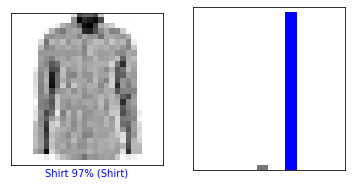

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

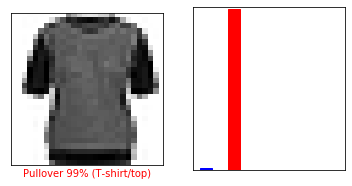

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

(28, 28, 1)
(1, 28, 28, 1)
[[3.7608609e-07 1.6534735e-10 1.3104407e-04 1.7592944e-08 3.1510551e-02
  2.5958440e-11 9.6835673e-01 2.4428525e-11 8.0820024e-11 1.3591321e-06]]


6

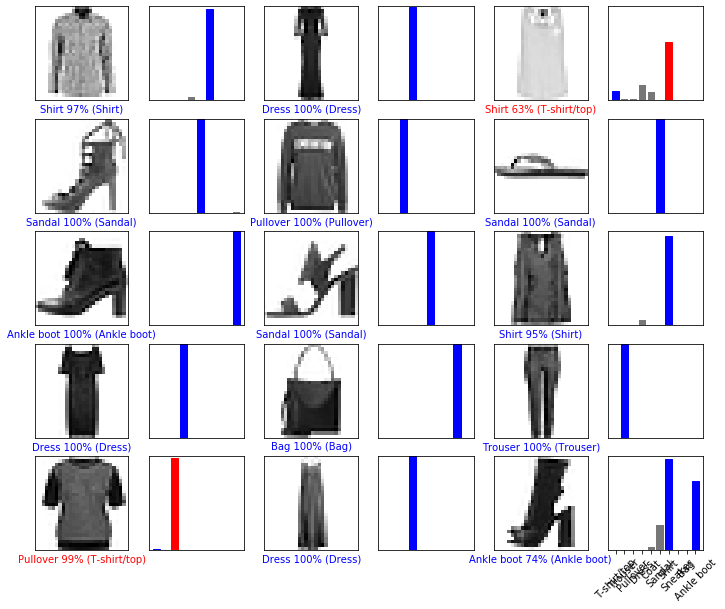

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    
img = test_images[0]
print(img.shape)
img = np.array([img])
print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])